# 1.The Problem Definition

The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information

Additional Information
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [1]:
# importing
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import chardet
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 2.DATA EXTRACTION

## 2.1.UPLOADING AND EXPLORING THE DATA

In [2]:
# uploading data
path = "../seoul_bike_sharing_demand\SeoulBikeData.csv"

In [3]:
df_seoulbike = pd.read_csv(path)

In [4]:
df_seoulbike.head(7)

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.0,0.0,0.0,Winter,No Holiday,Yes


## 2.1.2.FINDING OUT THE ENCODING TYPE


In [5]:
#Let's clean the varible's names to work with it.
df_seoulbike.columns.to_list()

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(�C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(�C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [6]:
#Ok we have a little suprise here. The symbol �, I don't know o que that means. 
#So I had to findout what is this to work with pandas.
#So I will use the chardet library to help me with this.
with open(path, 'rb') as encoding:
    r_encoding = chardet.detect(encoding.read(100000))
r_encoding


{'encoding': 'ISO-8859-9',
 'confidence': 0.7396635956274547,
 'language': 'Turkish'}

In [7]:
# Good, now I will open the as a dataframe with the right encoding.
with open (path,'r',encoding=r_encoding['encoding']) as df_seoulbike:
    df_seoulbike= pd.read_csv(df_seoulbike)

In [8]:
df_seoulbike.columns.to_list()

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

## 2.1.3.CLEANING THE COLUMNS' NAME

In [9]:
#Building a function to clean the columns name. Taking out the space and putting all in lower case:
replacing1= {" ":"_"}


cols = [col.strip().lower().replace(" ","_")
       for col in df_seoulbike.columns]

df_seoulbike.columns = cols
df_seoulbike.columns.to_list()

['date',
 'rented_bike_count',
 'hour',
 'temperature(°c)',
 'humidity(%)',
 'wind_speed_(m/s)',
 'visibility_(10m)',
 'dew_point_temperature(°c)',
 'solar_radiation_(mj/m2)',
 'rainfall(mm)',
 'snowfall_(cm)',
 'seasons',
 'holiday',
 'functioning_day']

###  2.1.4.CHECKING THE DATA'S SHAPE AND NAN VALUES 

In [10]:
#Let's check the shape of the dataset
initial_shape = df_seoulbike.shape
initial_shape

(8760, 14)

In [11]:
#Good, Now let's see if we have some missing values.
# So I can do it with a isnan function
df_seoulbike.isna().sum()

date                         0
rented_bike_count            0
hour                         0
temperature(°c)              0
humidity(%)                  0
wind_speed_(m/s)             0
visibility_(10m)             0
dew_point_temperature(°c)    0
solar_radiation_(mj/m2)      0
rainfall(mm)                 0
snowfall_(cm)                0
seasons                      0
holiday                      0
functioning_day              0
dtype: int64

<AxesSubplot:>

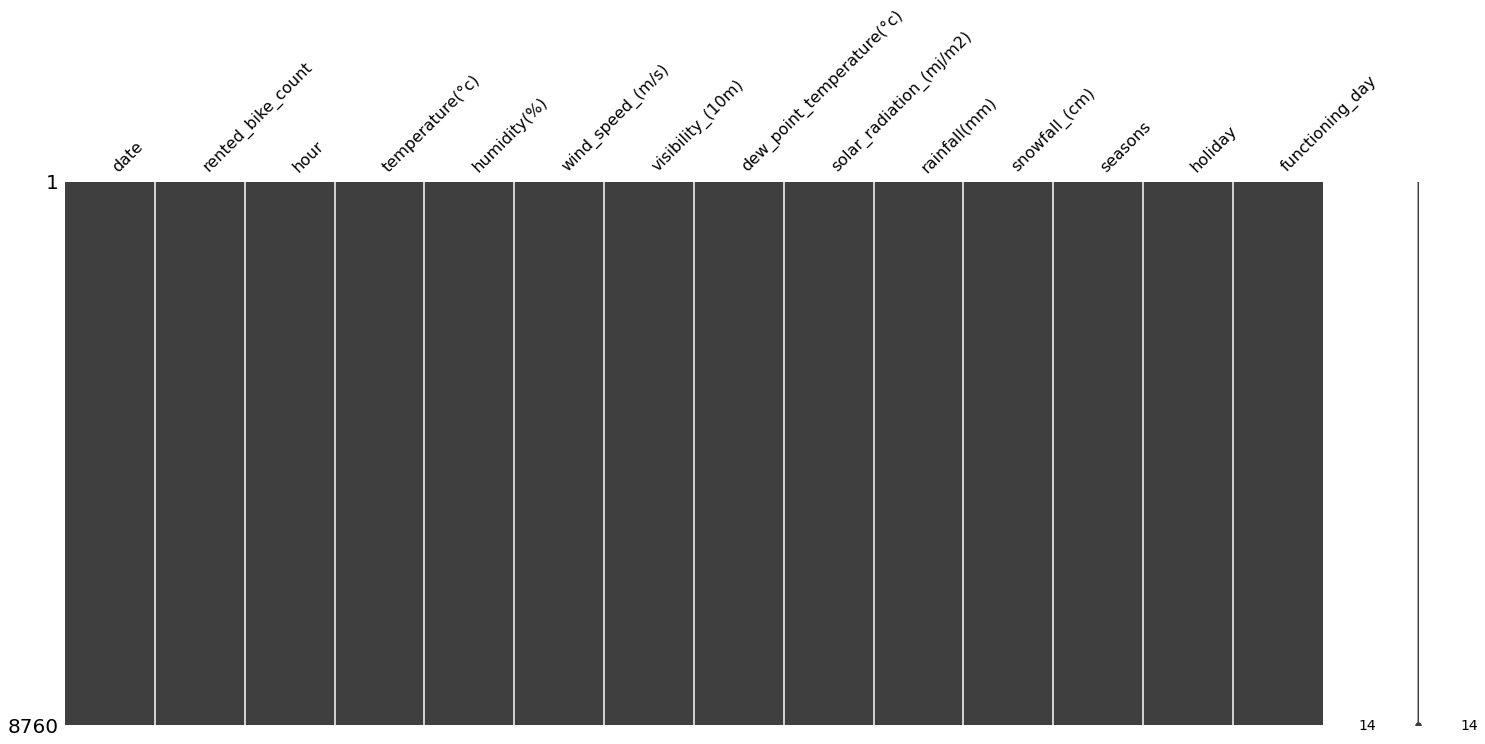

In [12]:
#I could also check it with a missingno library
msno.matrix(df_seoulbike)

### 2.1.5.CHECKING THE DATA'S TYPES 

In [13]:
#Ok really no missing values
#Let's ckeck the type of columns do we have
df_seoulbike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       8760 non-null   object 
 1   rented_bike_count          8760 non-null   int64  
 2   hour                       8760 non-null   int64  
 3   temperature(°c)            8760 non-null   float64
 4   humidity(%)                8760 non-null   int64  
 5   wind_speed_(m/s)           8760 non-null   float64
 6   visibility_(10m)           8760 non-null   int64  
 7   dew_point_temperature(°c)  8760 non-null   float64
 8   solar_radiation_(mj/m2)    8760 non-null   float64
 9   rainfall(mm)               8760 non-null   float64
 10  snowfall_(cm)              8760 non-null   float64
 11  seasons                    8760 non-null   object 
 12  holiday                    8760 non-null   object 
 13  functioning_day            8760 non-null   objec

In [14]:
memory_usage1 = df_seoulbike.memory_usage().sum()

In [15]:
df_seoulbike.dtypes

date                          object
rented_bike_count              int64
hour                           int64
temperature(°c)              float64
humidity(%)                    int64
wind_speed_(m/s)             float64
visibility_(10m)               int64
dew_point_temperature(°c)    float64
solar_radiation_(mj/m2)      float64
rainfall(mm)                 float64
snowfall_(cm)                float64
seasons                       object
holiday                       object
functioning_day               object
dtype: object

In [16]:
int_type = df_seoulbike.select_dtypes(include = "integer").columns.to_list()
float_type = df_seoulbike.select_dtypes(include = "float").columns.to_list()
object_type = df_seoulbike.select_dtypes(include = "object").columns.to_list()

print("The int columns type are: ")
print(int_type)
print()

print("The float columns type are: ")
print(float_type)

print("The object columns type are: ")
print(object_type)



The int columns type are: 
['rented_bike_count', 'hour', 'humidity(%)', 'visibility_(10m)']

The float columns type are: 
['temperature(°c)', 'wind_speed_(m/s)', 'dew_point_temperature(°c)', 'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)']
The object columns type are: 
['date', 'seasons', 'holiday', 'functioning_day']


In [17]:
df_seoulbike.select_dtypes(include = "integer").head(3)

,rented_bike_count,hour,humidity(%),visibility_(10m)
0,254,0,37,2000
1,204,1,38,2000
2,173,2,39,2000


In [18]:
df_seoulbike.select_dtypes(include = "float").head(3)

,temperature(°c),wind_speed_(m/s),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
0,-5.2,2.2,-17.6,0.0,0.0,0.0
1,-5.5,0.8,-17.6,0.0,0.0,0.0
2,-6.0,1.0,-17.7,0.0,0.0,0.0


In [19]:
df_seoulbike.select_dtypes(include = "object").head(3)

,date,seasons,holiday,functioning_day
0,01/12/2017,Winter,No Holiday,Yes
1,01/12/2017,Winter,No Holiday,Yes
2,01/12/2017,Winter,No Holiday,Yes


In [20]:
#Hun I'm not sure we need use float64 in all float types. Maybe we can improve it.
#Let's ckeck the usage of all memory.
first_memory_usage = df_seoulbike.memory_usage(deep=True)
first_memory_usage

Index                           128
date                         586920
rented_bike_count             70080
hour                          70080
temperature(°c)               70080
humidity(%)                   70080
wind_speed_(m/s)              70080
visibility_(10m)              70080
dew_point_temperature(°c)     70080
solar_radiation_(mj/m2)       70080
rainfall(mm)                  70080
snowfall_(cm)                 70080
seasons                      551880
holiday                      585624
functioning_day              525305
dtype: int64

## 3.DATA ANALYSING AND PREPROCESSING

### 3.1.Feature Engineering:

##### Ok now we know the type of columns we are working with. Let's casting some of then and create other ones to build our analisys. For that let's create a class to treat our data.


### 3.1.1- Variable Transformation

#### 3.1.1.1 - A class to treat the data

In [21]:


class Treating_data:
    '''
    A class to cast the datetypes and to create new columns date type.. 
    Changing the data type, creating new date columns information and changing the new columns date type.
    '''
    
    def __init__(self, df_bike):
        '''
        Creating the sequence of treating to data.
        '''
        self.df_bike = df_bike
        self.changing_type(self.df_bike)
        self.creating_date_info(self.df_bike)
        self.changing_type_after_date_info(self.df_bike)
        self.changing_to_binary_column(self.df_bike)


    def changing_type(self,df_seoulbike):
        '''
        A functon to change the size of float type, 
        to create a column to datetime type and change object type to category type.
        '''
        for coluna in df_seoulbike.columns:
            if "temperature" in coluna:
                df_seoulbike[coluna] = df_seoulbike[coluna].astype("float16")
            elif "date" in coluna:
                df_seoulbike[coluna] = pd.to_datetime(arg=df_seoulbike[coluna],format= "%d/%m/%Y")
            elif coluna in ['seasons','holiday','functioning_day']:
                df_seoulbike[coluna] = df_seoulbike[coluna].astype("category")
        return  df_seoulbike


    def creating_date_info(self,df_seoulbike):
        '''
        A function to create date type columns.
        '''
        df_seoulbike['day_of_week'] =df_seoulbike['date'].dt.day_name() 
        df_seoulbike['year'] = df_seoulbike['date'].dt.year
        df_seoulbike['month'] = df_seoulbike['date'].dt.month #I need this feature to stratify during the train and test moment
        #df_seoulbike['day_of_year'] = df_seoulbike['date'].dt.dayofyear
        #df_seoulbike['week_of_year'] = df_seoulbike['date'].dt.isocalendar().week
        #df_seoulbike['month_name'] = df_seoulbike['date'].dt.month_name()
        #df_seoulbike['period_day'] = df_seoulbike['date'].dt.strftime('%a')
        df_seoulbike['month_name'] = df_seoulbike['date'].dt.strftime('%b')
        return  df_seoulbike

    def changing_type_after_date_info(self,df_seoulbike):
        '''
        A function to cast columns as category.
        '''
        for coluna in df_seoulbike.columns:
            if coluna in ['day_of_week','year','month','week_of_year', 'month_name','hour']:
                df_seoulbike[coluna] = df_seoulbike[coluna].astype("category")
        return  df_seoulbike
    
    def changing_to_binary_column(self,df_seoulbike):
        '''
         A function to cast columns as binary.
        '''
        df_seoulbike["holiday"] = df_seoulbike["holiday"].map({"No Holiday":0,"Holiday":1})
        df_seoulbike["functioning_day"] = df_seoulbike["functioning_day"].map({"No" : 0, "Yes":1})


In [22]:
#let's instancied our data into the class
df_seoulbike = Treating_data(df_seoulbike)

In [23]:
df_seoulbike.df_bike.head(7)

,date,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,month_name
0,2017-12-01,254,0,-5.199219,37,2.2,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec
1,2017-12-01,204,1,-5.500000,38,0.8,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec
2,2017-12-01,173,2,-6.000000,39,1.0,2000,-17.703125,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec
3,2017-12-01,107,3,-6.199219,40,0.9,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec
4,2017-12-01,78,4,-6.000000,36,2.3,2000,-18.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec
5,2017-12-01,100,5,-6.398438,37,1.5,2000,-18.703125,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec
6,2017-12-01,181,6,-6.601562,35,1.3,2000,-19.500000,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec


In [24]:

df_seoulbike_treated = df_seoulbike.df_bike

In [25]:
#saving the dataframe to use in Power BI Analysis
df_seoulbike_treated.to_csv('../documents/df_seoulbike_treated.csv', index=False) 

In [26]:
#checking the new information of the data types and memory usage.
#As you can see we change the type of the data.
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       8760 non-null   datetime64[ns]
 1   rented_bike_count          8760 non-null   int64         
 2   hour                       8760 non-null   category      
 3   temperature(°c)            8760 non-null   float16       
 4   humidity(%)                8760 non-null   int64         
 5   wind_speed_(m/s)           8760 non-null   float64       
 6   visibility_(10m)           8760 non-null   int64         
 7   dew_point_temperature(°c)  8760 non-null   float16       
 8   solar_radiation_(mj/m2)    8760 non-null   float64       
 9   rainfall(mm)               8760 non-null   float64       
 10  snowfall_(cm)              8760 non-null   float64       
 11  seasons                    8760 non-null   category      
 12  holida

In [27]:
df_seoulbike_treated.select_dtypes(include = "float").columns.to_list()

['wind_speed_(m/s)',
 'solar_radiation_(mj/m2)',
 'rainfall(mm)',
 'snowfall_(cm)']

In [28]:
#We still having something to work here. See, we had cast all the numerical types as 64. But do we really need it?
#Let's check the max and min of each column

df_seoulbike_treated.select_dtypes(include = "float").describe()

,wind_speed_(m/s),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,1.724909,0.569111,0.148687,0.075068
std,1.036300,0.868746,1.128193,0.436746
min,0.000000,0.000000,0.000000,0.000000
25%,0.900000,0.000000,0.000000,0.000000
50%,1.500000,0.010000,0.000000,0.000000
75%,2.300000,0.930000,0.000000,0.000000
max,7.400000,3.520000,35.000000,8.800000


In [29]:
#The np.finfo(dtype) function provides information about machine limits for floating-point data types

print(f"The range of the float64 is {np.finfo(np.float64)}")
print(f"The range of the float32 is {np.finfo(np.float32)}")
print(f"The range of the float16 is {np.finfo(np.float16)}")

The range of the float64 is Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
---------------------------------------------------------------

The range of the float32 is Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------

The range of the float16 is Machine parameters for floa

*eps (epsilon)*: The difference between 1.0 and the next representable floating point number greater than 1.0. For example, for 64-bit binary floats in the IEEE-754 standard, eps is approximately 2.22e-16. 
  
*epsneg:* The difference between 1.0 and the next representable floating point number less than 1.0. For 64-bit binary floats, epsneg is approximately 1.11e-16.  
  
*max:* The largest representable number of the appropriate floating point type.
  
*min:* The smallest representable number of the appropriate floating point type (usually the negative of the maximum value).  
  
*precision:* The approximate number of decimal digits this type of float is accurate to.

In [30]:
# Ok let's cast the float columns considering the interval of it float type.

df_seoulbike_treated['wind_speed_(m/s)'] = df_seoulbike_treated['wind_speed_(m/s)'].astype("float32")
df_seoulbike_treated['solar_radiation_(mj/m2)'] = df_seoulbike_treated['solar_radiation_(mj/m2)'].astype("float32")
df_seoulbike_treated['snowfall_(cm)'] = df_seoulbike_treated['snowfall_(cm)'].astype("float32")

In [31]:
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       8760 non-null   datetime64[ns]
 1   rented_bike_count          8760 non-null   int64         
 2   hour                       8760 non-null   category      
 3   temperature(°c)            8760 non-null   float16       
 4   humidity(%)                8760 non-null   int64         
 5   wind_speed_(m/s)           8760 non-null   float32       
 6   visibility_(10m)           8760 non-null   int64         
 7   dew_point_temperature(°c)  8760 non-null   float16       
 8   solar_radiation_(mj/m2)    8760 non-null   float32       
 9   rainfall(mm)               8760 non-null   float64       
 10  snowfall_(cm)              8760 non-null   float32       
 11  seasons                    8760 non-null   category      
 12  holida

In [32]:
memory_usage2 = df_seoulbike_treated.memory_usage().sum()

#### 3.1.1.1.2 - Checking the memory usage after casted the data

In [33]:
print(memory_usage1)
print(memory_usage2)
print(f'The memory usage improved in {round((memory_usage2/memory_usage1)*100,2)}%')

981248
563240
The memory usage improved in 57.4%


In [34]:
df_seoulbike_treated.describe()

,rented_bike_count,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,inf,58.226256,1.724905,1436.825799,4.074219,0.569111,0.148687,0.075068
std,644.997468,11.945312,20.362413,1.036305,608.298712,13.054688,0.868734,1.128193,0.436725
min,0.000000,-17.796875,0.000000,0.000000,27.000000,-30.593750,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.699219,0.000000,0.000000,0.000000
50%,504.500000,13.703125,57.000000,1.500000,1698.000000,5.101562,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.796875,0.930000,0.000000,0.000000
max,3556.000000,39.406250,98.000000,7.400000,2000.000000,27.203125,3.520000,35.000000,8.800000


In [35]:
#checking the shape
df_seoulbike_treated.shape

(8760, 18)

##### 3.1.1.1.3 - Checking the categorical columns

In [36]:
df_categorical_columns = df_seoulbike_treated.select_dtypes(include = "category")
df_categorical_columns 

,hour,seasons,holiday,functioning_day,day_of_week,year,month,month_name
0,0,Winter,0,1,Friday,2017,12,Dec
1,1,Winter,0,1,Friday,2017,12,Dec
2,2,Winter,0,1,Friday,2017,12,Dec
3,3,Winter,0,1,Friday,2017,12,Dec
4,4,Winter,0,1,Friday,2017,12,Dec
...,...,...,...,...,...,...,...,...
8755,19,Autumn,0,1,Friday,2018,11,Nov
8756,20,Autumn,0,1,Friday,2018,11,Nov
8757,21,Autumn,0,1,Friday,2018,11,Nov
8758,22,Autumn,0,1,Friday,2018,11,Nov


In [37]:
categorical_columns = df_categorical_columns.columns
categorical_columns

Index(['hour', 'seasons', 'holiday', 'functioning_day', 'day_of_week', 'year',
       'month', 'month_name'],
      dtype='object')

In [38]:
df_seoulbike_treated.head(7)

,date,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,month_name
0,2017-12-01,254,0,-5.199219,37,2.2,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec
1,2017-12-01,204,1,-5.500000,38,0.8,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec
2,2017-12-01,173,2,-6.000000,39,1.0,2000,-17.703125,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec
3,2017-12-01,107,3,-6.199219,40,0.9,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec
4,2017-12-01,78,4,-6.000000,36,2.3,2000,-18.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec
5,2017-12-01,100,5,-6.398438,37,1.5,2000,-18.703125,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec
6,2017-12-01,181,6,-6.601562,35,1.3,2000,-19.500000,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec


In [39]:
#Let's varify how many years do we have
df_seoulbike_treated['year'].unique()

[2017, 2018]
Categories (2, int64): [2017, 2018]

In [40]:
df_seoulbike_treated = df_seoulbike_treated.drop(["date"],axis=1, inplace=False)

In [41]:
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   rented_bike_count          8760 non-null   int64   
 1   hour                       8760 non-null   category
 2   temperature(°c)            8760 non-null   float16 
 3   humidity(%)                8760 non-null   int64   
 4   wind_speed_(m/s)           8760 non-null   float32 
 5   visibility_(10m)           8760 non-null   int64   
 6   dew_point_temperature(°c)  8760 non-null   float16 
 7   solar_radiation_(mj/m2)    8760 non-null   float32 
 8   rainfall(mm)               8760 non-null   float64 
 9   snowfall_(cm)              8760 non-null   float32 
 10  seasons                    8760 non-null   category
 11  holiday                    8760 non-null   category
 12  functioning_day            8760 non-null   category
 13  day_of_week                8760 n

In [42]:
df_seoulbike_treated.head(7)

,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,month_name
0,254,0,-5.199219,37,2.2,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec
1,204,1,-5.500000,38,0.8,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec
2,173,2,-6.000000,39,1.0,2000,-17.703125,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec
3,107,3,-6.199219,40,0.9,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec
4,78,4,-6.000000,36,2.3,2000,-18.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec
5,100,5,-6.398438,37,1.5,2000,-18.703125,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec
6,181,6,-6.601562,35,1.3,2000,-19.500000,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,Dec


In [43]:
df_seoulbike_treated.describe()

,rented_bike_count,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,inf,58.226256,1.724905,1436.825799,4.074219,0.569111,0.148687,0.075068
std,644.997468,11.945312,20.362413,1.036305,608.298712,13.054688,0.868734,1.128193,0.436725
min,0.000000,-17.796875,0.000000,0.000000,27.000000,-30.593750,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.699219,0.000000,0.000000,0.000000
50%,504.500000,13.703125,57.000000,1.500000,1698.000000,5.101562,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.796875,0.930000,0.000000,0.000000
max,3556.000000,39.406250,98.000000,7.400000,2000.000000,27.203125,3.520000,35.000000,8.800000


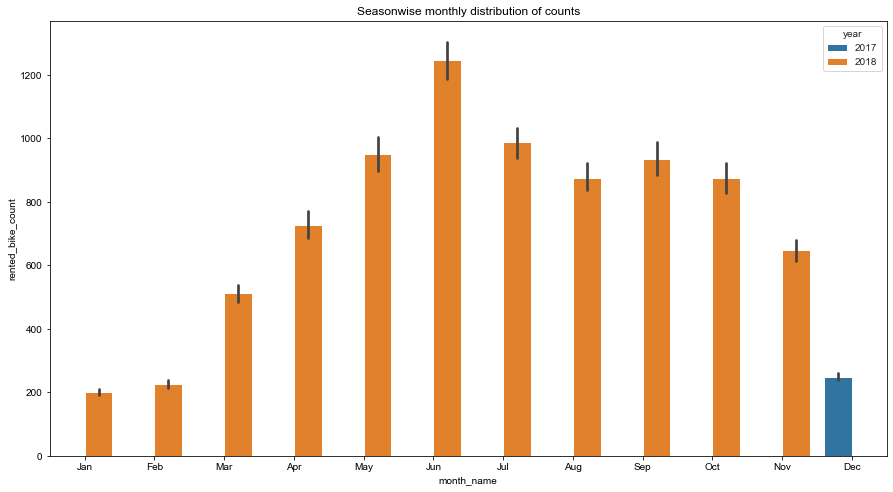

In [44]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month_name',y='rented_bike_count',data=df_seoulbike_treated[['month_name','rented_bike_count','year']],hue='year',order=['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

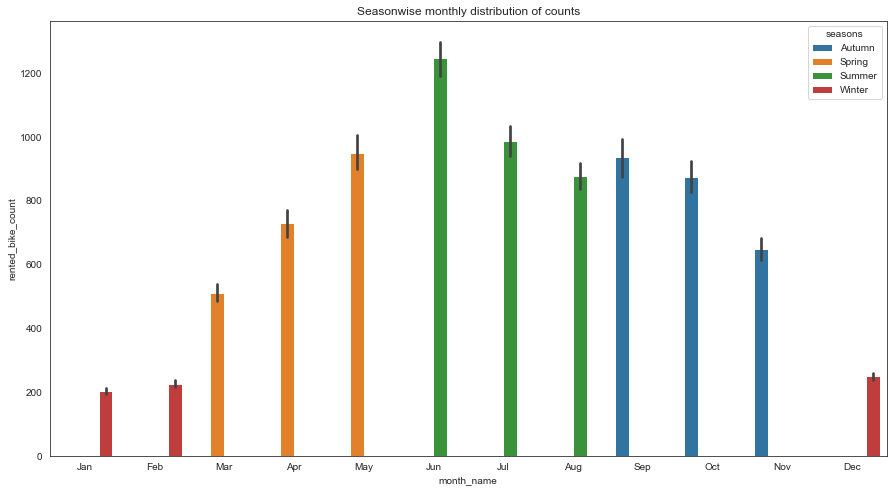

In [45]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month_name',y='rented_bike_count',data=df_seoulbike_treated[['month_name','rented_bike_count','seasons']],hue='seasons',order=['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

### Detecting Outliers

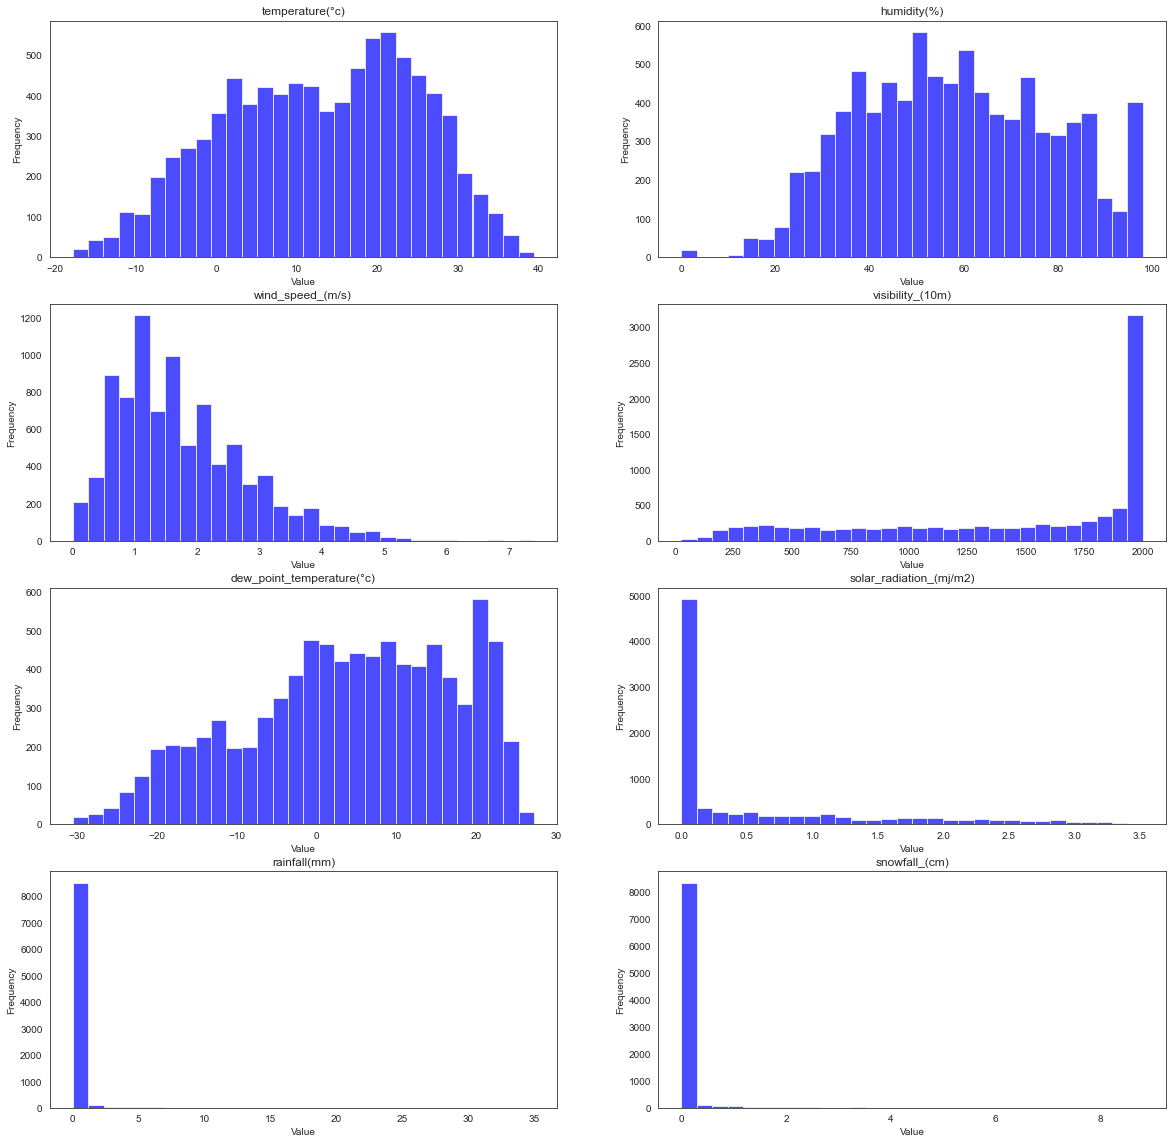

In [46]:
#First let's build a histogram to each numerical feature in our dataset.

featuare =["temperature(°c)","humidity(%)","wind_speed_(m/s)",
     "visibility_(10m)", "dew_point_temperature(°c)",
     "solar_radiation_(mj/m2)","rainfall(mm)","snowfall_(cm)"
    ]
    

# Creating a figure and subplots for each feature
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  

# Iterating over each feature
for i, attribute in enumerate(featuare):  
    row, col = divmod(i, 2)
    axes[row, col].hist(df_seoulbike_treated[attribute], bins=30, color="blue", alpha=0.7)
    axes[row, col].set_title(attribute)
    
# Adjusting label and titles
for ax in axes.flat:
    ax.set(xlabel="Value", ylabel="Frequency")

# Oculte os rótulos do eixo x e y nos subplots superiores e à direita
#for ax in axes.flat:
#    ax.label_outer()

# Showing the chart
plt.show()

In [47]:
#Desvio padrão
temp_media,temp_std = df_seoulbike_treated["temperature(°c)"].mean(),df_seoulbike_treated["temperature(°c)"].std()
cut_off = temp_std*3
lower, upper = temp_media-cut_off,temp_media+cut_off
idx = np.where((df_seoulbike_treated["temperature(°c)"]<lower)|(df_seoulbike_treated["temperature(°c)"]>upper))


In [48]:
#checking the values
print(temp_media)
print(temp_std)
print(f" Indexes to exclude {idx}, the length of idx is {len(idx[0])}." )

inf
11.945
 Indexes to exclude (array([   0,    1,    2, ..., 8757, 8758, 8759], dtype=int64),), the length of idx is 8760.


In [49]:
# we have a problem here.. the media if infinite. We have to cast the number as float64so solve it.


df_seoulbike_treated["temperature(°c)"] = df_seoulbike_treated["temperature(°c)"].astype("float64")

In [50]:
#now lets to it again
#Desvio padrão
temp_media,temp_std = df_seoulbike_treated["temperature(°c)"].mean(),df_seoulbike_treated["temperature(°c)"].std()
cut_off = temp_std*3
lower, upper = temp_media-cut_off,temp_media+cut_off
idx = np.where((df_seoulbike_treated["temperature(°c)"]<lower)|(df_seoulbike_treated["temperature(°c)"]>upper))
#checking the values
print(temp_media)
print(temp_std)
print(f" Indexes to exclude {idx}, the length of idx is {len(idx[0])}." )


12.882921791947595
11.94488062956912
 Indexes to exclude (array([], dtype=int64),), the length of idx is 0.


#Veja o array ficou zerado... 

Relação com o seu Cálculo:
O seu cálculo do cut_off usando temp_std * 3 é uma aproximação semelhante ao método dos outliers extremos.
Ele define uma faixa de valores em torno da média (ou mediana) que é considerada “normal”.
Valores fora dessa faixa são considerados outliers.

Ok neste caso vou calcular por 1,5 aproximado do desvio leve the Tukey

Sim, você está correto! A substituição do fator de multiplicação de 3 por 1,5 é uma aproximação dos outliers leves (ou mild outliers) de Tukey. Vamos entender melhor:

Outliers Leves (Mild Outliers):
Os outliers leves são valores que estão moderadamente distantes dos quartis (Q1 e Q3) em uma distribuição.
O método dos limites de Tukey define os limites inferior e superior para detecção de outliers leves como:
Limite Inferior: Q1 - 1,5 * IQR
Limite Superior: Q3 + 1,5 * IQR
Valores fora dessa faixa são considerados outliers leves.
Relação com o seu Cálculo:
Ao usar temp_std * 1,5, você está aplicando uma abordagem semelhante aos outliers leves de Tukey.
Essa escolha é mais conservadora do que o uso de 3 desvios padrão, pois considera menos valores como outliers.
Contexto e Ajuste:
A escolha do fator de multiplicação depende do contexto dos seus dados e da sensibilidade à detecção de outliers.
Se você deseja ser mais rigoroso na identificação de outliers, pode usar 3 desvios padrão (como você fez inicialmente).
Se preferir uma abordagem mais suave, 1,5 desvio padrão é uma opção adequada.
Portanto, ajustar o fator de multiplicação para 1,5 é uma maneira válida de aproximar os outliers leves de Tukey. Escolha o valor que melhor se alinha com seus objetivos de análise

In [51]:
#now lets to it again with 1,5
#Desvio padrão
temp_media,temp_std = df_seoulbike_treated["temperature(°c)"].mean(),df_seoulbike_treated["temperature(°c)"].std()
cut_off = temp_std*1.5
lower, upper = temp_media-cut_off,temp_media+cut_off
idx = np.where((df_seoulbike_treated["temperature(°c)"]<lower)|(df_seoulbike_treated["temperature(°c)"]>upper))
#checking the values
print(temp_media)
print(temp_std)
print(f" Indexes to exclude {idx}, the length of idx is {len(idx[0])}." )


12.882921791947595
11.94488062956912
 Indexes to exclude (array([   0,    1,    2, ..., 6373, 6375, 6376], dtype=int64),), the length of idx is 1125.


Ok, este foi um cálculo aproximado do método de Tukey, mas vou fazer agora  o método real e ver a diferença. Assim serei mais precisa.
O cálculo que você usou, multiplicando o desvio padrão por um fator (como 3), é uma abordagem comum para detectar outliers. No entanto, ele não é especificamente chamado de “método de desvio padrão”. Vamos esclarecer:

Desvio Padrão:
O desvio padrão é uma medida de dispersão que indica o quanto os valores de um conjunto de dados se afastam da média.
Ele não é usado diretamente para detectar outliers, mas é uma ferramenta importante para entender a variabilidade dos dados.
Método de Tukey:
O método de Tukey, desenvolvido por John Tukey, é uma abordagem mais geral para detectar outliers.
Ele usa os quartis (Q1 e Q3) e o IQR (intervalo interquartil) para definir limites para identificar valores incomuns.
Os limites inferior e superior são calculados como:
Limite Inferior: Q1 - 1,5 * IQR
Limite Superior: Q3 + 1,5 * IQR
Valores fora desses limites são considerados outliers.
Relação com o seu Cálculo:
O seu cálculo usando o desvio padrão multiplicado por 3 é uma aproximação dos limites de Tukey.
Embora não seja exatamente o mesmo método, ele segue uma lógica semelhante para identificar valores extremos.
Portanto, o que você fez não está errado, mas é importante entender que existem diferentes abordagens para detectar outliers. O método de Tukey é mais robusto e leva em consideração a variabilidade dos dados. Se você deseja uma detecção mais precisa, considere usar os limites de Tukey. 🚀 1: https://www.ermontoro.com/post/teste-rápido-de-tukey 2: https://statologos.com/prueba-de-tukey-diferencia-significativa-honesta/ 3: https://www.infoescola.com/estatistica/teste-de-comparacao-de-medias-teste-de-tukey/ 4: https://edisciplinas.usp.br/pluginfile.php/4434614/mod_resource/content/0/aula6.pdf

## Tukey

### Calculating the Mild Outliers

In [52]:
df_seoulbike_treated["temperature(°c)"].describe()

count    8760.000000
mean       12.882922
std        11.944881
min       -17.796875
25%         3.500000
50%        13.703125
75%        22.500000
max        39.406250
Name: temperature(°c), dtype: float64

In [53]:
temp_Q1 = df_seoulbike_treated["temperature(°c)"].quantile(0.25)
temp_Q3 = df_seoulbike_treated["temperature(°c)"].quantile(0.75)

print(f"The first Quantile of Temperature is {temp_Q1}")
print(f"The Thrid Quantile of Temperature is {temp_Q3}")

The first Quantile of Temperature is 3.5
The Thrid Quantile of Temperature is 22.5


In [54]:
temp_IQR =temp_Q3-temp_Q1
temp_IQR

19.0

In [55]:
#Calculating the Mild Outliers

temp_lower_bound = temp_Q1-(1.5 * temp_IQR)
temp_upper_bound = temp_Q3+(1.5 * temp_IQR)
print(f"The Temperature Mild Lower Bound is {temp_lower_bound}")
print(f"The Temperature Mild Upper Bound is {temp_upper_bound}")

The Temperature Mild Lower Bound is -25.0
The Temperature Mild Upper Bound is 51.0


In [56]:
#Nowlet's find the real outliers

idxIQMild = np.where((df_seoulbike_treated["temperature(°c)"]<temp_lower_bound)|(df_seoulbike_treated["temperature(°c)"]>temp_upper_bound))
print(f" Indexes to exclude {idxIQMild}, the length of idx is {len(idxIQMild[0])}." )

 Indexes to exclude (array([], dtype=int64),), the length of idx is 0.


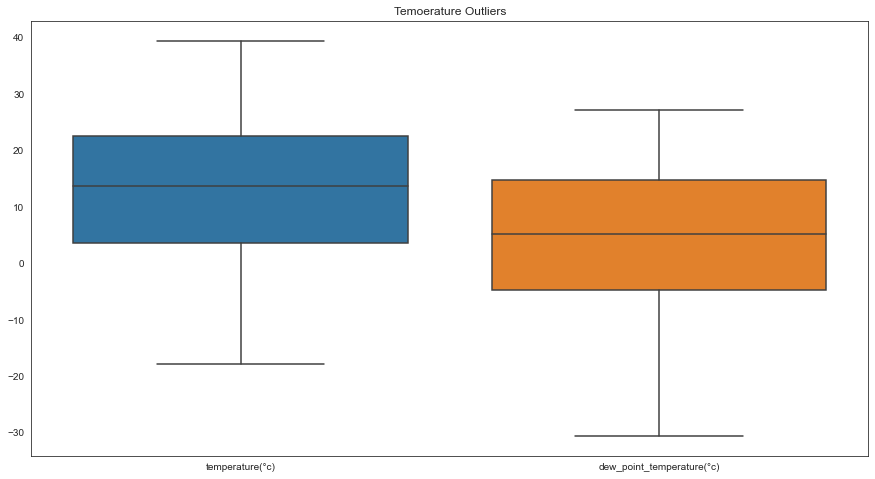

In [57]:
#Hun that means that we dont have outliers here, Let's see it in detail: 

celsius = []
for mensure in float_type:
    if '(°c)' in mensure:
        celsius.append(mensure)
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for xxx _outliers
sns.boxplot(data=df_seoulbike_treated[celsius])
ax.set_title('Temoerature Outliers')
plt.show()

### Humidity Outliers

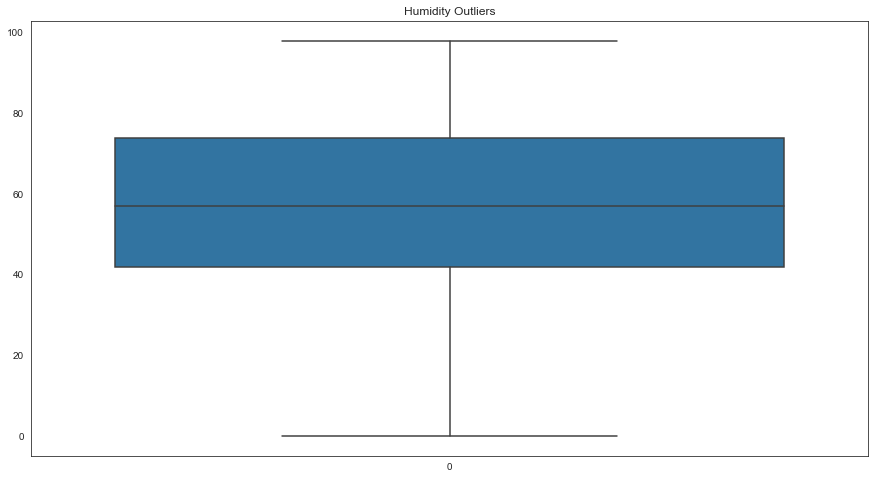

In [58]:
#OK good lets check the humidty

fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Humidity Outliers
sns.boxplot(data=df_seoulbike_treated['humidity(%)'])
ax.set_title('Humidity Outliers')
plt.show()

### Wind Speed Outliers

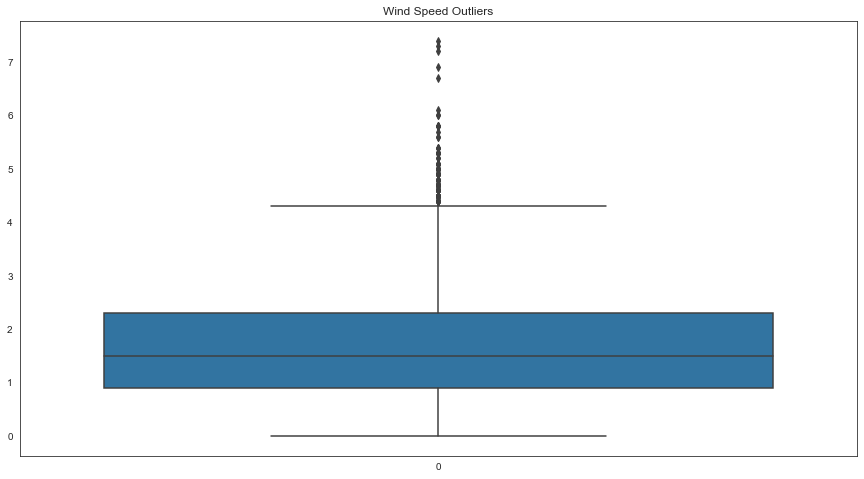

In [59]:
#Wind Speed
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Wind Speed Outliers
sns.boxplot(data=df_seoulbike_treated['wind_speed_(m/s)'])
ax.set_title('Wind Speed Outliers')
plt.show()

In [60]:
#wow we have a lot of outliers here. Let's identify them:



In [61]:
df_seoulbike_treated['wind_speed_(m/s)'].describe()

count    8760.000000
mean        1.724905
std         1.036305
min         0.000000
25%         0.900000
50%         1.500000
75%         2.300000
max         7.400000
Name: wind_speed_(m/s), dtype: float64

In [62]:
wind_speed_Q1 = df_seoulbike_treated['wind_speed_(m/s)'].quantile(0.25)
wind_speed_Q3 = df_seoulbike_treated['wind_speed_(m/s)'].quantile(0.75)

print(f"The first Quantile of Wind_Speed is {wind_speed_Q1}")
print(f"The Thrid Quantile of Wind_Speed is {wind_speed_Q3}")

The first Quantile of Wind_Speed is 0.8999999761581421
The Thrid Quantile of Wind_Speed is 2.299999952316284


In [63]:
wind_speed_IQR = wind_speed_Q3-wind_speed_Q1
wind_speed_IQR

1.399999976158142

### Calculating the Mild Outliers

In [64]:
#Calculating the Mild Outliers

mild_lower_bound = wind_speed_Q1-(1.5 * wind_speed_IQR)
mild_upper_bound = wind_speed_Q3+(1.5 * wind_speed_IQR)
print(f"The Mild Lower Bound is {mild_lower_bound}")
print(f"The Mild Upper Bound is {mild_upper_bound}")

The Mild Lower Bound is -1.199999988079071
The Mild Upper Bound is 4.399999916553497


### Calculating the Extreme Outlier


In [65]:
extreme_lower_bound = wind_speed_Q1-(3 * wind_speed_IQR)
extreme_upper_bound = wind_speed_Q3+(3 * wind_speed_IQR)
print(f"The Extreme Lower Bound is {extreme_lower_bound}")
print(f"The Extreme Upper Bound is {extreme_upper_bound}")

The Extreme Lower Bound is -3.299999952316284
The Extreme Upper Bound is 6.4999998807907104


In [66]:
outliers_lied_upper = df_seoulbike_treated['wind_speed_(m/s)']>mild_upper_bound

In [67]:
#Now let's determine the number of outlier thar are lie outside of the mild_upper_bound

number_of_outliers_lied_upper=(df_seoulbike_treated['wind_speed_(m/s)']>mild_upper_bound).sum()
number_of_outliers_lied_upper

144

In [68]:
#Calculating the percentage of wind_speed lied over the Mild Upper Bound
(df_seoulbike_treated['wind_speed_(m/s)']>mild_upper_bound).mean()*100

1.643835616438356

In [69]:
#So now we'll identify which ones they are.
wind_speed_outliers= df_seoulbike_treated[df_seoulbike_treated['wind_speed_(m/s)']>mild_upper_bound]
wind_speed_outliers

,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,month_name
82,311,10,-1.099609,40,4.5,2000,-13.000000,0.64,0.0,0.0,Winter,0,1,Monday,2017,12,Dec
84,393,12,-0.300049,38,4.8,1823,-12.898438,1.11,0.0,0.0,Winter,0,1,Monday,2017,12,Dec
85,391,13,0.000000,30,5.4,1938,-15.500000,1.17,0.0,0.0,Winter,0,1,Monday,2017,12,Dec
86,338,14,0.099976,27,4.5,2000,-16.703125,1.09,0.0,0.0,Winter,0,1,Monday,2017,12,Dec
87,341,15,-0.099976,25,5.8,2000,-17.796875,0.88,0.0,0.0,Winter,0,1,Monday,2017,12,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7933,1118,13,10.601562,38,4.6,2000,-3.099609,1.63,0.0,0.0,Autumn,0,1,Saturday,2018,10,Oct
7937,1176,17,9.500000,34,5.7,2000,-5.601562,0.45,0.0,0.0,Autumn,0,1,Saturday,2018,10,Oct
7985,1274,17,10.000000,43,4.9,2000,-2.000000,0.43,0.0,0.0,Autumn,0,1,Monday,2018,10,Oct
8242,0,10,11.296875,68,4.7,1984,5.500000,0.44,0.0,0.0,Autumn,0,0,Friday,2018,11,Nov


In [70]:
wind_speed_outliers.describe()

,rented_bike_count,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,540.416667,7.561092,43.159722,4.942362,1670.097222,-5.160156,1.204167,0.165278,0.086806
std,470.266678,11.784777,19.727041,0.545494,501.575508,13.898438,1.036060,1.116333,0.254263
min,0.000000,-14.500000,14.000000,4.500000,214.000000,-30.593750,0.000000,0.000000,0.000000
25%,190.750000,-2.024902,30.000000,4.600000,1560.250000,-17.726562,0.160000,0.000000,0.000000
50%,314.000000,5.298828,37.000000,4.800000,1928.500000,-6.300781,1.090000,0.000000,0.000000
75%,939.500000,18.644531,53.000000,5.000000,2000.000000,5.125977,1.890000,0.000000,0.000000
max,2068.000000,33.312500,96.000000,7.400000,2000.000000,23.093750,3.320000,13.000000,1.000000


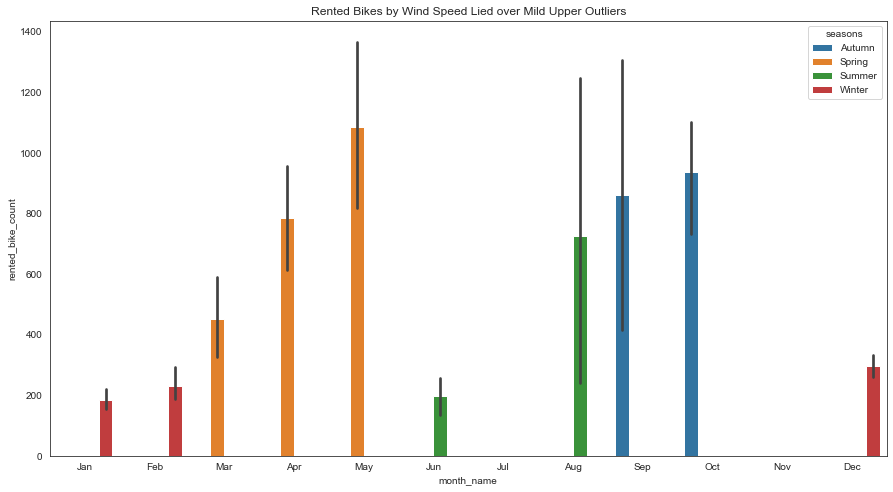

In [71]:
#let's see in which season that happened

fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month_name',y='rented_bike_count',data=wind_speed_outliers[['month_name','rented_bike_count','seasons']],hue='seasons',order=['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],ax=ax)

ax.set_title('Rented Bikes by Wind Speed Lied over Mild Upper Outliers')
plt.show()

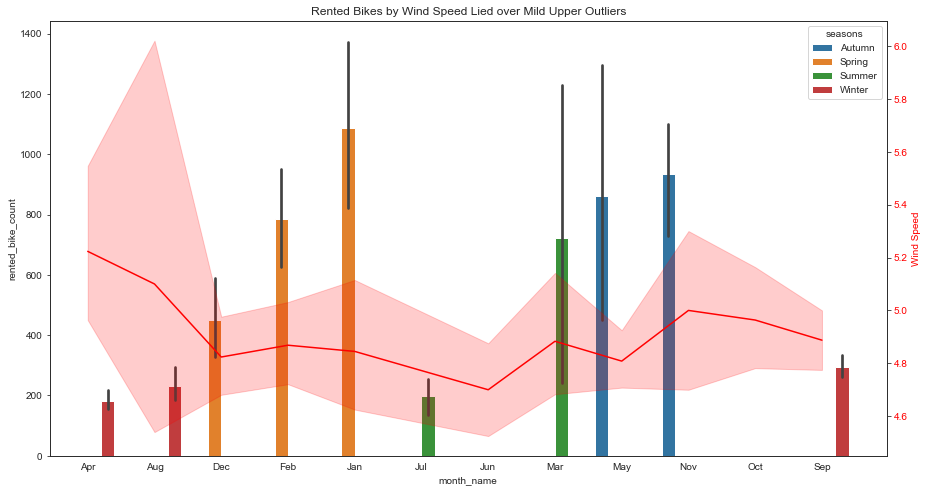

In [72]:
#let's see in which season that happened

fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month_name',y='rented_bike_count',data=wind_speed_outliers[['month_name','rented_bike_count','seasons']],hue='seasons',order=['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],ax=ax)

# Criar o segundo eixo y
ax2 = ax.twinx()

# Plotar a variável "wind speed" no segundo eixo y
sns.lineplot(x='month_name', y='wind_speed_(m/s)', data=wind_speed_outliers, color='red', ax=ax2)

# Personalizar o segundo eixo y
ax2.set_ylabel('Wind Speed', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax.set_title('Rented Bikes by Wind Speed Lied over Mild Upper Outliers')
plt.show()

Interresting, we can see that are some months that we don't have rented bikes with a over lied speed wind. Let's considering that we are filtering just data with speed outliers. Lets check it with all the data.

O “sombreamento” vermelho ao redor da linha vermelha no gráfico é conhecido como intervalo de confiança. Ele não representa a média, mas sim a variabilidade dos dados. Vou explicar em detalhes:

Intervalo de Confiança (CI):
O Seaborn, ao plotar uma linha (ou qualquer outra série temporal) com sns.lineplot(), por padrão, inclui um intervalo de confiança.
Esse intervalo de confiança é uma faixa sombreada que mostra a variabilidade dos dados em torno da linha.
Ele é calculado com base na dispersão dos valores e geralmente é definido como um intervalo de 95% de confiança.
O que o intervalo de confiança representa?:
O intervalo de confiança indica a incerteza associada à estimativa da linha (ou série temporal).
Em outras palavras, ele nos diz quão confiantes podemos estar de que a verdadeira linha (ou série temporal) está dentro dessa faixa.
Variabilidade dos Dados:
Quando você tem vários valores de “wind speed” no mesmo mês, a variabilidade pode ser alta.
O intervalo de confiança reflete essa variabilidade, mostrando a dispersão dos dados ao redor da linha média.
Personalização do Intervalo de Confiança:
Se você deseja remover o intervalo de confiança, pode fazê-lo especificando ci=None no sns.lineplot().
Por exemplo:
Python

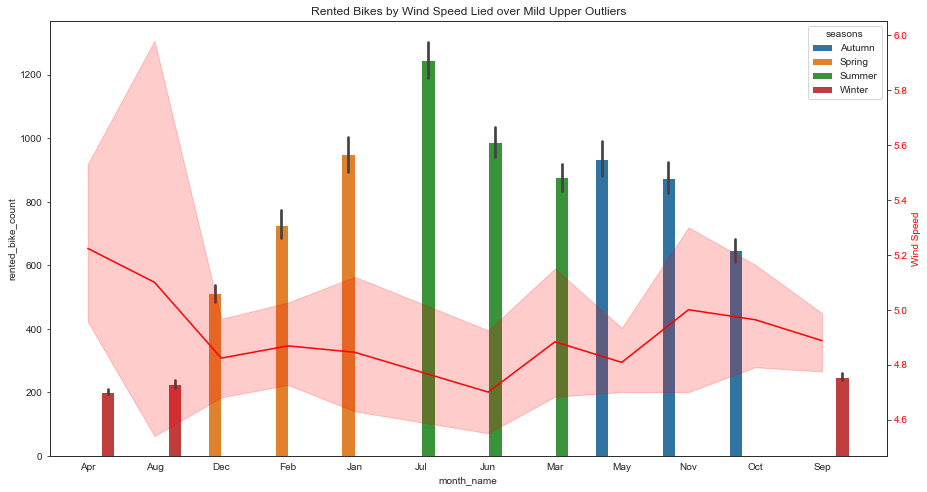

In [73]:
#let's see in which season that happened

fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month_name',y='rented_bike_count',data=df_seoulbike_treated[['month_name','rented_bike_count','seasons']],hue='seasons',order=['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],ax=ax)

# Criar o segundo eixo y
ax2 = ax.twinx()

# Plotar a variável "wind speed" no segundo eixo y
sns.lineplot(x='month_name', y='wind_speed_(m/s)', data=wind_speed_outliers, color='red', ax=ax2)

# Personalizar o segundo eixo y
ax2.set_ylabel('Wind Speed', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax.set_title('Rented Bikes by Wind Speed Lied over Mild Upper Outliers')
plt.show()

In [74]:
df_seoulbike_treated['wind_speed_(m/s)'].describe()

count    8760.000000
mean        1.724905
std         1.036305
min         0.000000
25%         0.900000
50%         1.500000
75%         2.300000
max         7.400000
Name: wind_speed_(m/s), dtype: float64

# checking....

In [75]:
#Good we have just one value and we don't have NAN values in our classification binning

In [76]:
#now let's do the same to visibility feature

In [77]:
import statistics

# Calcula o desvio padrão e a média
desvio_padrao = statistics.stdev(df_seoulbike_treated['wind_speed_(m/s)'])

In [78]:
desvio_padrao

1.036299991483835

In [79]:
media = statistics.mean(df_seoulbike_treated['wind_speed_(m/s)'])

In [80]:
media

1.7249086756965137

In [81]:
# Define um limite para identificar outliers (por exemplo, 2.3 vezes o desvio padrão)
limite_outliers = 2.3 * desvio_padrao

In [82]:
# Filtra os valores que não são outliers
velocidades_sem_outliers = [v for v in df_seoulbike_treated['wind_speed_(m/s)'] if abs(v - media) <= limite_outliers]

In [83]:
# Calcula a média sem outliers
media_sem_outliers = statistics.mean(velocidades_sem_outliers)

print(f"Média sem outliers: {media_sem_outliers:.2f}")

Média sem outliers: 1.65


Neste caso eu deveria substituir pela média sem outliers

## Mediana:
Para calcular a mediana, você pode usar a função statistics.median():

In [84]:
mediana = statistics.median(velocidades_sem_outliers)
print(f"Mediana: {mediana:.2f}")


Mediana: 1.50


In [85]:
#first I will replace the outliers with the Media values
indices = outliers['wind_speed_(m/s)'].index


NameError: name 'outliers' is not defined

In [ ]:
df_seoulbike_treated.loc[indices,'wind_speed_(m/s)']=media_sem_outliers

In [ ]:
#No now wwe dont have wind_speed over the mild_upper_bound
df_seoulbike_treated[df_seoulbike_treated['wind_speed_(m/s)']>mild_upper_bound]

In [86]:
df_seoulbike_treated.describe()

,rented_bike_count,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724905,1436.825799,4.074219,0.569111,0.148687,0.075068
std,644.997468,11.944881,20.362413,1.036305,608.298712,13.054688,0.868734,1.128193,0.436725
min,0.000000,-17.796875,0.000000,0.000000,27.000000,-30.593750,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.699219,0.000000,0.000000,0.000000
50%,504.500000,13.703125,57.000000,1.500000,1698.000000,5.101562,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.796875,0.930000,0.000000,0.000000
max,3556.000000,39.406250,98.000000,7.400000,2000.000000,27.203125,3.520000,35.000000,8.800000


#NÃO FAZER O REPLACE#######Now I will replace the original dataset with the NAN values
df_seoulbike_treated['wind_speed_(m/s)']=df_seoulbike_treated['wind_speed_(m/s)'].replace(df_seoulbike_treated_wind_speed_lied_upper_outliers_nan['wind_speed_(m/s)'])

In [87]:
#Veja agora vai constar os NANs
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   rented_bike_count          8760 non-null   int64   
 1   hour                       8760 non-null   category
 2   temperature(°c)            8760 non-null   float64 
 3   humidity(%)                8760 non-null   int64   
 4   wind_speed_(m/s)           8760 non-null   float32 
 5   visibility_(10m)           8760 non-null   int64   
 6   dew_point_temperature(°c)  8760 non-null   float16 
 7   solar_radiation_(mj/m2)    8760 non-null   float32 
 8   rainfall(mm)               8760 non-null   float64 
 9   snowfall_(cm)              8760 non-null   float32 
 10  seasons                    8760 non-null   category
 11  holiday                    8760 non-null   category
 12  functioning_day            8760 non-null   category
 13  day_of_week                8760 n

<AxesSubplot:>

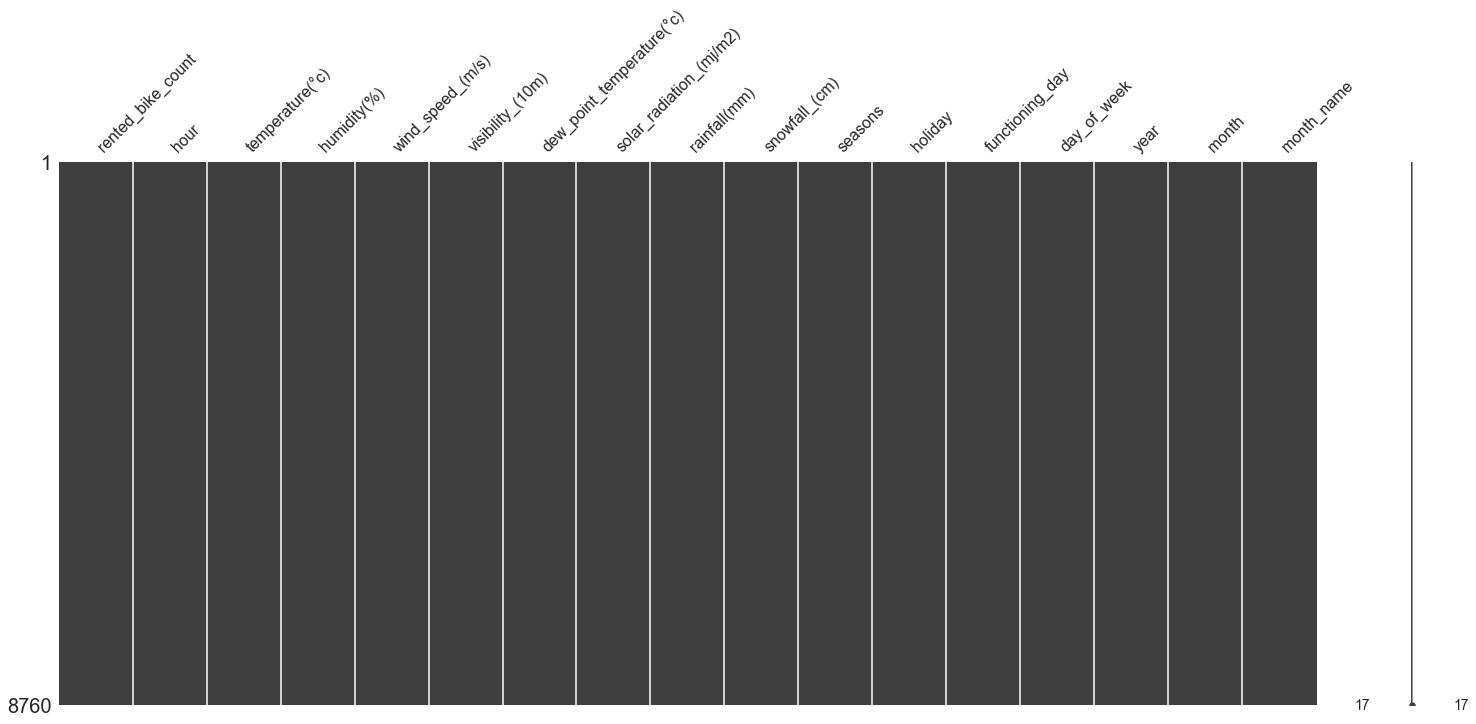

In [88]:
msno.matrix(df_seoulbike_treated)

In [89]:
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   rented_bike_count          8760 non-null   int64   
 1   hour                       8760 non-null   category
 2   temperature(°c)            8760 non-null   float64 
 3   humidity(%)                8760 non-null   int64   
 4   wind_speed_(m/s)           8760 non-null   float32 
 5   visibility_(10m)           8760 non-null   int64   
 6   dew_point_temperature(°c)  8760 non-null   float16 
 7   solar_radiation_(mj/m2)    8760 non-null   float32 
 8   rainfall(mm)               8760 non-null   float64 
 9   snowfall_(cm)              8760 non-null   float32 
 10  seasons                    8760 non-null   category
 11  holiday                    8760 non-null   category
 12  functioning_day            8760 non-null   category
 13  day_of_week                8760 n

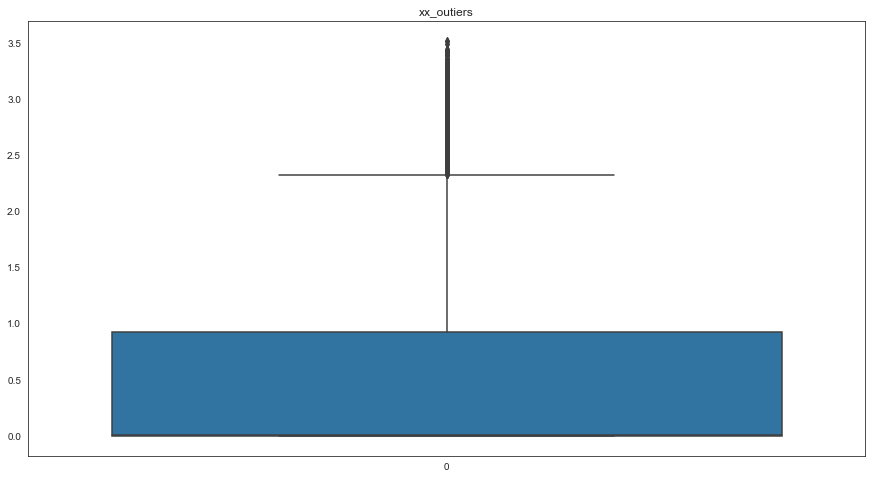

In [90]:


fig,ax=plt.subplots(figsize=(15,8))
#Box plot for xxx _outliers
sns.boxplot(data=df_seoulbike_treated['solar_radiation_(mj/m2)'])
ax.set_title('xx_outiers')
plt.show()

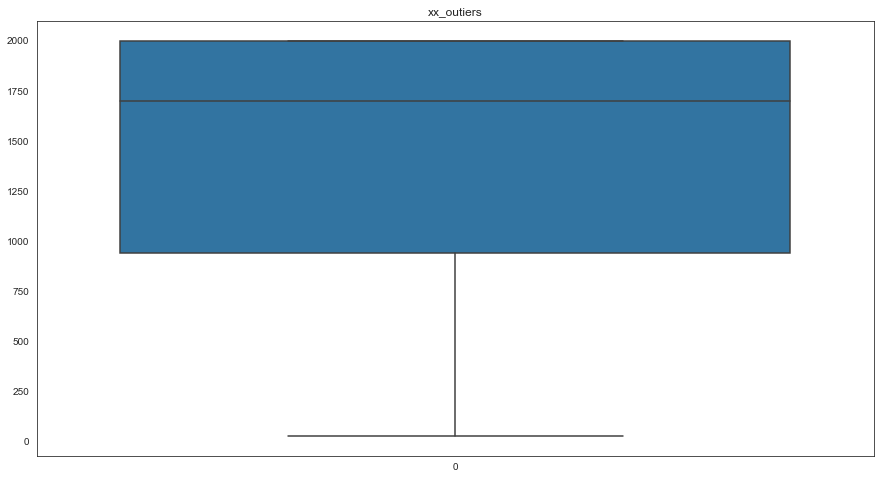

In [91]:



fig,ax=plt.subplots(figsize=(15,8))
#Box plot for xxx _outliers
sns.boxplot(data=df_seoulbike_treated['visibility_(10m)'])
ax.set_title('xx_outiers')
plt.show()

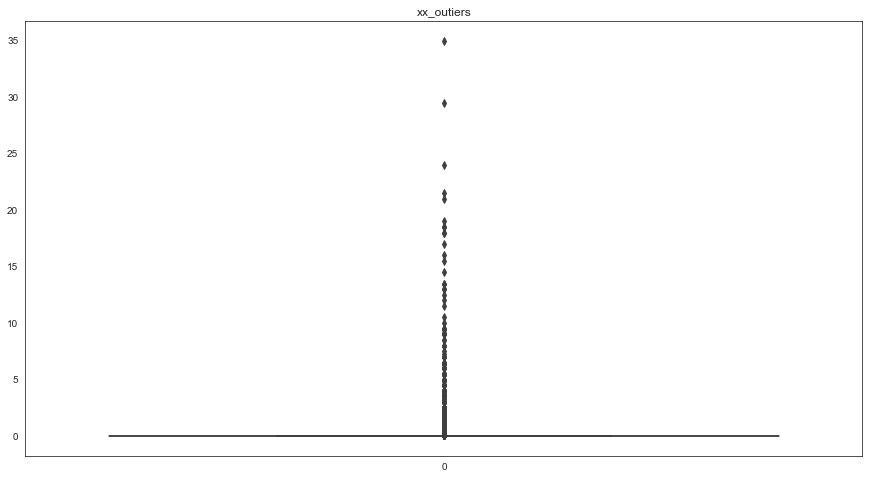

In [92]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for xxx _outliers
sns.boxplot(data=df_seoulbike_treated['rainfall(mm)'])
ax.set_title('xx_outiers')
plt.show()

In [93]:
df_seoulbike_treated['rainfall(mm)'].value_counts()

0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
7.3        1
24.0       1
7.5        1
9.1        1
1.4        1
Name: rainfall(mm), Length: 61, dtype: int64

<AxesSubplot:>

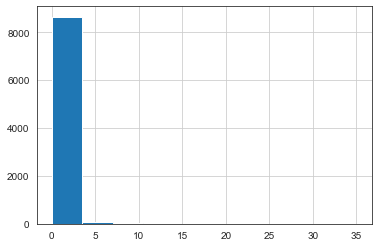

In [94]:
df_seoulbike_treated['rainfall(mm)'].hist()

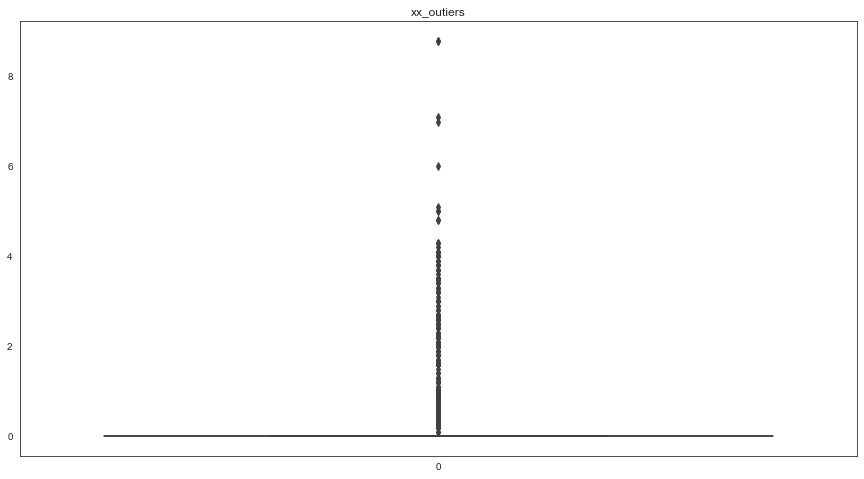

In [95]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for xxx _outliers
sns.boxplot(data=df_seoulbike_treated['snowfall_(cm)'])
ax.set_title('xx_outiers')
plt.show()

In [96]:
# for our model we also do not need the "month_name", once we already have the "month" column and the "year" colum is not necessary once we preview the new value the new will be in the future and not in the past

df_seoulbike_treated=df_seoulbike_treated.drop(columns=['month_name', 'year'])

<AxesSubplot:>

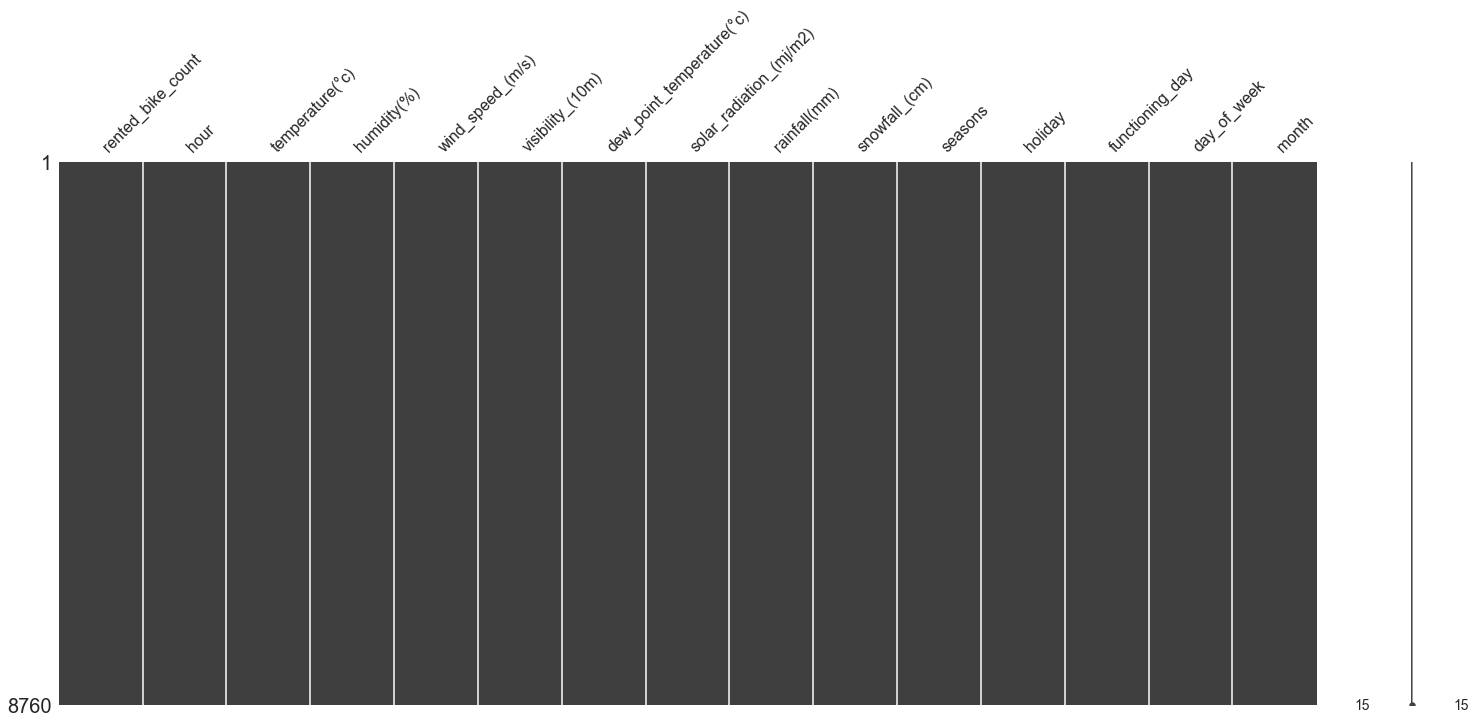

In [97]:
#checking for NAN values
msno.matrix(df_seoulbike_treated)

In [98]:
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   rented_bike_count          8760 non-null   int64   
 1   hour                       8760 non-null   category
 2   temperature(°c)            8760 non-null   float64 
 3   humidity(%)                8760 non-null   int64   
 4   wind_speed_(m/s)           8760 non-null   float32 
 5   visibility_(10m)           8760 non-null   int64   
 6   dew_point_temperature(°c)  8760 non-null   float16 
 7   solar_radiation_(mj/m2)    8760 non-null   float32 
 8   rainfall(mm)               8760 non-null   float64 
 9   snowfall_(cm)              8760 non-null   float32 
 10  seasons                    8760 non-null   category
 11  holiday                    8760 non-null   category
 12  functioning_day            8760 non-null   category
 13  day_of_week                8760 n

In [99]:
df_seoulbike_treated.select_dtypes(include ="category")

,hour,seasons,holiday,functioning_day,day_of_week,month
0,0,Winter,0,1,Friday,12
1,1,Winter,0,1,Friday,12
2,2,Winter,0,1,Friday,12
3,3,Winter,0,1,Friday,12
4,4,Winter,0,1,Friday,12
...,...,...,...,...,...,...
8755,19,Autumn,0,1,Friday,11
8756,20,Autumn,0,1,Friday,11
8757,21,Autumn,0,1,Friday,11
8758,22,Autumn,0,1,Friday,11


In [100]:
df_seoulbike_treated.select_dtypes(include ="category")

,hour,seasons,holiday,functioning_day,day_of_week,month
0,0,Winter,0,1,Friday,12
1,1,Winter,0,1,Friday,12
2,2,Winter,0,1,Friday,12
3,3,Winter,0,1,Friday,12
4,4,Winter,0,1,Friday,12
...,...,...,...,...,...,...
8755,19,Autumn,0,1,Friday,11
8756,20,Autumn,0,1,Friday,11
8757,21,Autumn,0,1,Friday,11
8758,22,Autumn,0,1,Friday,11


In [101]:
categorical_columns = df_seoulbike_treated.select_dtypes(include ="category").columns.to_list()

In [102]:
categorical_columns

['hour', 'seasons', 'holiday', 'functioning_day', 'day_of_week', 'month']

In [103]:
#from sklearn.model_selection import train_test_split
target_y = df_seoulbike_treated["rented_bike_count"]
features_x = df_seoulbike_treated.drop("rented_bike_count",axis=1, inplace=False)
train_x,test_x, train_y,test_y = train_test_split(features_x, target_y, test_size=0.2, stratify=features_x['month'].to_numpy(), shuffle = True)

#### The scikit-learn does not provide any support for variable selection using a forward selection approach.   We will write a custom class for that. page 108

In [104]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.sparse import csr_matrix
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

###incluir CategoricalVaribleEncoder class from page 53 of pragmatic Machine Learning
class CategoricalVaribleEncoder(BaseEstimator): #page 53
    
    def __init__(self,categorical_features):
        self.categorical_features = categorical_features
        self.preprocessing_transformer = make_column_transformer((OneHotEncoder(handle_unknown="ignore"),
                                                                 self.categorical_features))
        
    def fit(self, X, y=None):
        self.preprocessing_transformer.fit(X)
        return self
        
    def transform(self, X):
        preprocessed_x = self.preprocessing_transformer.transform(X)
        return csr_matrix(preprocessed_x).todense()





class FowardSelectionLinearRegression(BaseEstimator): #page 108
    
    def __init__(self):
        self.optimal_predictors = None
        self.optimal_model = None
        
    def fit(self, X,y=None):
        current_predictors = []
        if not isinstance(X,pd.DataFrame):
            X = pd.DataFrame(X)
        remaining_predictors = list(X)
        adjusted_r2_diff = 1
        last_adjusted_r2 = 0
        
        while True:
            best_predictor, adjusted_r2, r2 = self._get_next_best_predictor_(X=X, Y=y, current_predictors = current_predictors,
                                                                           remaining_predictors = remaining_predictors)
            adjusted_r2_diff = round(adjusted_r2 - last_adjusted_r2, 2)
            if adjusted_r2_diff <= 0.00 or len(remaining_predictors) <= 0:
                break
                
            current_predictors.append(best_predictor)
            remaining_predictors.remove(best_predictor)
            last_adjusted_r2 = adjusted_r2
            
        self.optimal_predictors_ = current_predictors
        self.optimal_model_ = LinearRegression().fit(X[self.optimal_predictors_],y)
        
    def _adjusted_r2_score_(self, r2_val, n, k):
        return (1-(((1-r2_val)*(n-1))/(n-k-1)))
    
    def _get_next_best_predictor_(self, X, Y, current_predictors=None, remaining_predictors=None):
        max_adjusted_r2_val = 0
        adjusted_r2_val = 0
        best_r2_val = 0
        r2Val = 0
        best_predictor = None
        n = len(X)
        
        for predictor in remaining_predictors:
            lr = LinearRegression()
            
            predictors = []
            predictors.extend(current_predictors)
            predictors.append(predictor)
            
            lr.fit(X[predictors],Y)
            predY = lr.predict(X[predictors])
            r2Val = r2_score(Y,predY)
            adjusted_r2_val = self._adjusted_r2_score_(r2Val, n,len(predictors))
            if max_adjusted_r2_val < adjusted_r2_val:
                best_predictor = predictor
                max_adjusted_r2_val = adjusted_r2_val
                best_r2_val = r2Val
                
        return best_predictor, max_adjusted_r2_val, best_r2_val
    
    def predict(self, X):
        if not isinstance(X,pd.DataFrame):
            X = pd.DataFrame(X)
        X = X[self.optimal_predictors_]
        return self.optimal_model_.predict(X)
    

In [105]:
fs_lr = FowardSelectionLinearRegression()

bike_seoul_pl_fs_lr = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('scaler',StandardScaler()),
        ('foward_selection_model',fs_lr)
        
    ]
)
    
bike_seoul_pl_fs_lr.fit(train_x,train_y)
        

Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=['hour',
                                                                 'seasons',
                                                                 'holiday',
                                                                 'functioning_day',
                                                                 'day_of_week',
                                                                 'month'])),
                ('scaler', StandardScaler()),
                ('foward_selection_model', FowardSelectionLinearRegression())])

In [106]:
## page 110 to see the best predictors
list(df_seoulbike_treated.loc[fs_lr.optimal_predictors_])

['rented_bike_count',
 'hour',
 'temperature(°c)',
 'humidity(%)',
 'wind_speed_(m/s)',
 'visibility_(10m)',
 'dew_point_temperature(°c)',
 'solar_radiation_(mj/m2)',
 'rainfall(mm)',
 'snowfall_(cm)',
 'seasons',
 'holiday',
 'functioning_day',
 'day_of_week',
 'month']

In [107]:
len(list(df_seoulbike_treated.loc[fs_lr.optimal_predictors_]))

15

In [108]:
df_seoulbike_treated.shape

(8760, 15)

In [109]:
test_bike_seoul_pl_fs_lr_y = bike_seoul_pl_fs_lr.predict(test_x)


In [110]:
type(test_y)

pandas.core.series.Series

In [111]:
type(test_bike_seoul_pl_fs_lr_y)

numpy.ndarray

In [112]:
test_bike_seoul_pl_fs_lr_y_list = list(test_bike_seoul_pl_fs_lr_y)

In [113]:
len(test_bike_seoul_pl_fs_lr_y_list)

1752

In [114]:
len(list(test_y))

1752

In [115]:
r2_score_fs_lr = r2_score(list(test_y), test_bike_seoul_pl_fs_lr_y_list)

In [116]:
r2_score_fs_lr

0.5853496684344366

In [117]:
test_bike_seoul_pl_fs_lr_y.max(axis=0)

2049.902062920268

In [118]:
minimun_value_fs = test_bike_seoul_pl_fs_lr_y.min(axis=0)
minimun_value_fs

-692.015737038587

That's is not good we have negative numbers here. Can I rent negative bikes?
No!!


In [119]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
#print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(list(test_y), test_bike_seoul_pl_fs_lr_y_list))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(list(test_y), test_bike_seoul_pl_fs_lr_y_list))

Mean squared error: 171373.58
Coefficient of determination: 0.59


In [120]:
#muito bem, se eu apenas montar um gráfico como as horas se repentem vejam como ficaria o gráfico:

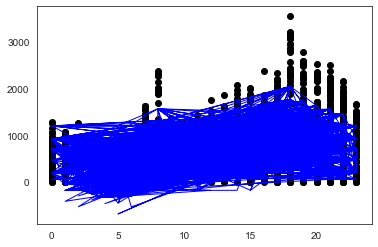

In [121]:
# Plot outputs
plt.scatter(test_x['hour'].to_numpy(), test_y, color="black")
plt.plot(test_x['hour'].to_numpy(), test_bike_seoul_pl_fs_lr_y, color="blue", linewidth=1)

#plt.xticks(())
#plt.yticks(())

plt.show()

#### Agrupando os valores para montar um gráfico com valores agrupados


In [122]:
#Bom para isto eu terei que voltar a unir os test_x e o text_y, assim como os valores previstos:


# Criar um DataFrame com as previsões e os valores reais
results_df = pd.DataFrame({'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': test_bike_seoul_pl_fs_lr_y})

# Agrupar os dados por hora e calcular a média das quantidades de bikes alugadas reais e previstas
grouped_data = results_df.groupby('hour').agg({'real_bike_count': 'mean', 'predicted_bike_count': 'mean'}).reset_index()




In [123]:
grouped_data

,hour,real_bike_count,predicted_bike_count
0,0,525.106061,675.493589
1,1,383.661538,341.154348
2,2,317.323529,321.970264
3,3,159.523810,202.824702
4,4,143.122222,154.433325
5,5,148.102564,187.084169
6,6,302.830986,295.496414
7,7,578.797468,610.891368
8,8,964.471698,1026.637537
9,9,649.745763,626.820704


## Plotting the Foward Selection Linear Regression charts

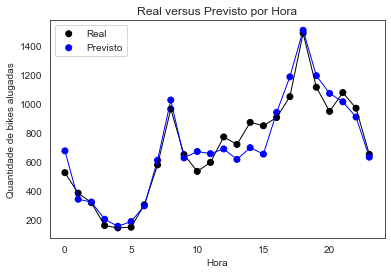

In [124]:

# Agrupar os dados por hora e calcular a média das quantidades de bikes alugadas reais e previstas

color_for_positive_real = 'black'
color_for_negative_real = 'coral'
color_for_positive_prevision = 'blue'
color_for_negative_prevision = 'red'


# Create an array of colors based on the values
colors_real = [color_for_positive_real if value >= 0 else color_for_negative_real for value in grouped_data['real_bike_count']]
color_prevision = [color_for_positive_prevision if value >= 0 else color_for_negative_prevision for value in grouped_data['predicted_bike_count']]
  

# Plotar o gráfico de dispersão com a média dos valores
plt.scatter(grouped_data['hour'], grouped_data['real_bike_count'], color=colors_real, label='Real')
plt.scatter(grouped_data['hour'], grouped_data['predicted_bike_count'], color=color_prevision, label='Previsto')

# Plotar as linhas conectando os pontos
plt.plot(grouped_data['hour'], grouped_data['real_bike_count'], color='black', linestyle='-', linewidth=1)
plt.plot(grouped_data['hour'], grouped_data['predicted_bike_count'], color='blue', linestyle='-', linewidth=1)

# Adicionar rótulos e título
plt.xlabel('Hora')
plt.ylabel('Quantidade de bikes alugadas')
plt.title('Real versus Previsto por Hora')
plt.legend()

# Mostrar o gráfico
plt.show()


In [125]:
def creating_charts_for_month(results_df):
    # Criar uma figura com subplots para cada mês
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))  # Assumindo 12 meses, ajuste conforme necessário

    # Iterar sobre cada mês e plotar os dados correspondentes
    for i, month in enumerate(range(1, 13)):  # Os meses estão numerados de 1 a 12
        ax = axes[i // 4, i % 4]  # Calcular a posição do subplot
        month_data = results_df[results_df['month'] == month]  # Selecionar os dados para o mês atual
        grouped_data = month_data.groupby('hour').agg({'real_bike_count': 'mean', 'predicted_bike_count': 'mean'}).reset_index()
    
        color_for_positive_real = 'black'
        color_for_negative_real = 'coral'
        color_for_positive_prevision = 'blue'
        color_for_negative_prevision = 'red'
    
        # Create an array of colors based on the values
        colors_real = [color_for_positive_real if value >= 0 else color_for_negative_real for value in grouped_data['real_bike_count']]
        color_prevision = [color_for_positive_prevision if value >= 0 else color_for_negative_prevision for value in grouped_data['predicted_bike_count']]
    
        # Plotar os dados do mês atual
        ax.scatter(grouped_data['hour'], grouped_data['real_bike_count'], color=colors_real, label='Real')
        ax.scatter(grouped_data['hour'], grouped_data['predicted_bike_count'], color=color_prevision, label='Previsto')
    
        # Plotar as linhas conectando os pontos
        ax.plot(grouped_data['hour'], grouped_data['real_bike_count'], color='black', linestyle='-', linewidth=1)
        ax.plot(grouped_data['hour'], grouped_data['predicted_bike_count'], color='blue', linestyle='-', linewidth=1)
    
        # Configurar títulos e rótulos do eixo
        month_name = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Set',10:'Oct',11:'Nov',12:'Dec'}
        ax.set_title(month_name[month])
        ax.set_xlabel('Hora')
        ax.set_ylabel('Quantidade de bikes alugadas')
        ax.legend()

    # Ajustar layout
    plt.tight_layout()

    # Mostrar os subplots
    plt.show()


In [126]:
#I really liked this chart, with it I can have a real idea about the prevision and the real bikes rented. But I wish see it by month. Lest see how it works


# Criar um DataFrame com as previsões e os valores reais
results_df = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': test_bike_seoul_pl_fs_lr_y})



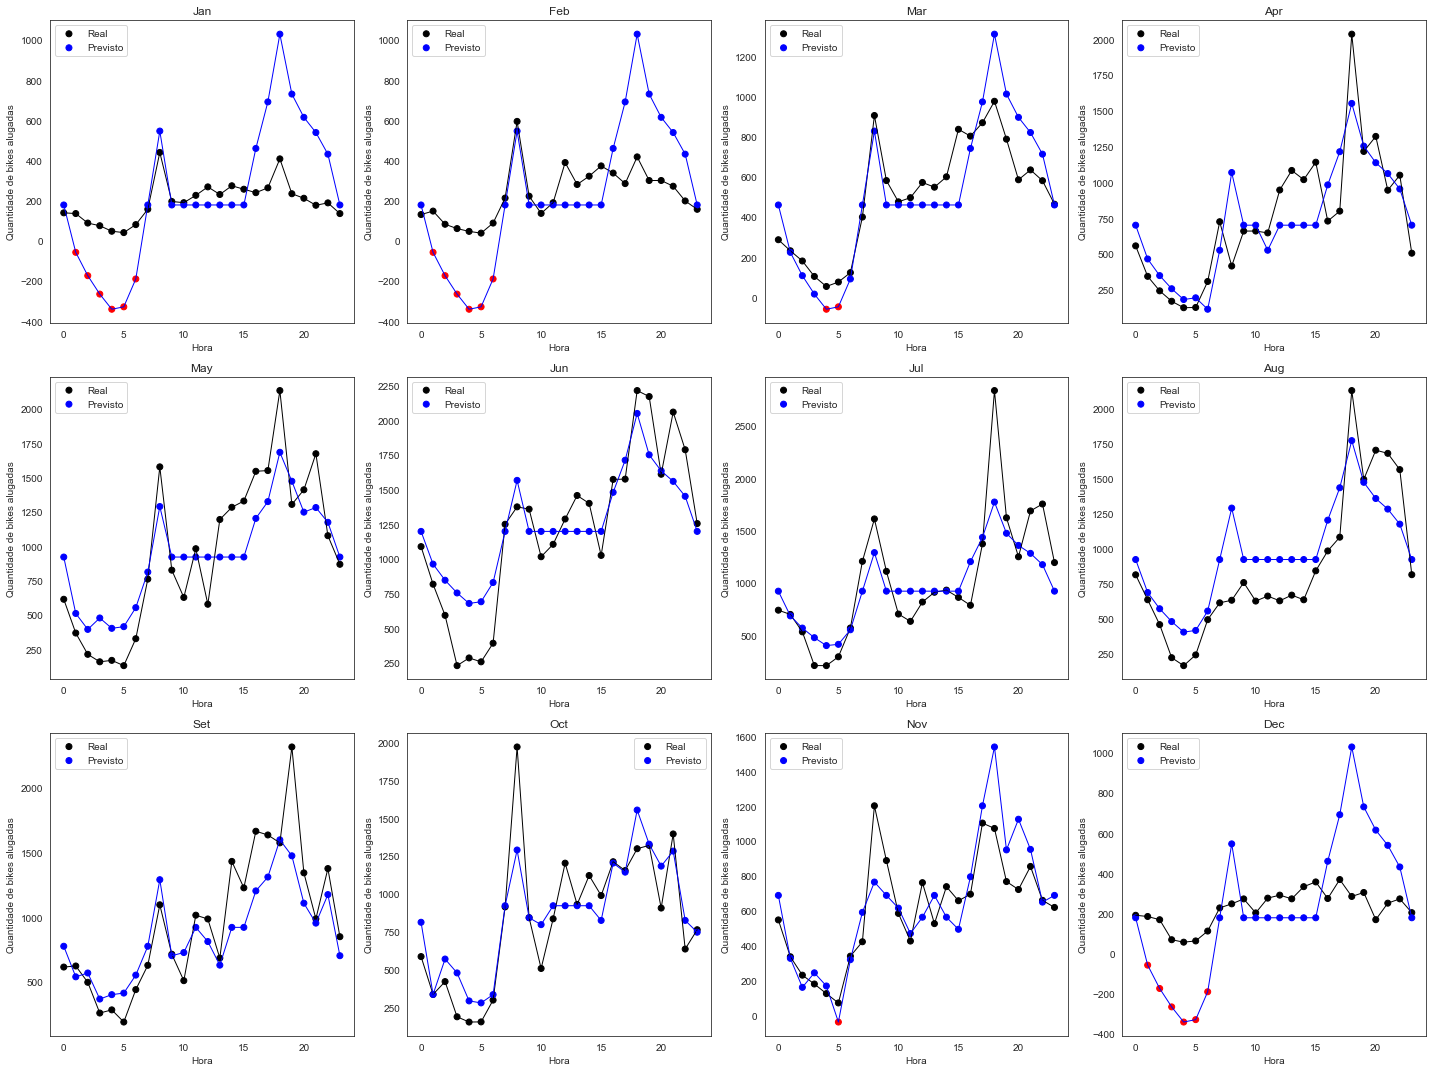

In [127]:
creating_charts_for_month(results_df)

TO DO: POIS É PARECE QUE ESTAMOS COM VALORES NEGATIVOS AQUI.... HUN... MAS QUE COISA... VOU TER QUE RESOLVER ISTO

In [128]:
# Ok let's fix it with the clipping tecnique. It's  post-processing tecnique.

predictions_clipped_fs_lr_y = np.clip(test_bike_seoul_pl_fs_lr_y, a_min=0, a_max=None)

In [131]:
#Let's fiz the charts witn the clipping tecnique applied



In [132]:
#I really liked this chart, with it I can have a real idea about the prevision and the real bikes rented. But I wish see it by month. Lest see how it works


# Criar um DataFrame com as previsões e os valores reais
results_df_clipped_fs_lr = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': predictions_clipped_fs_lr_y})


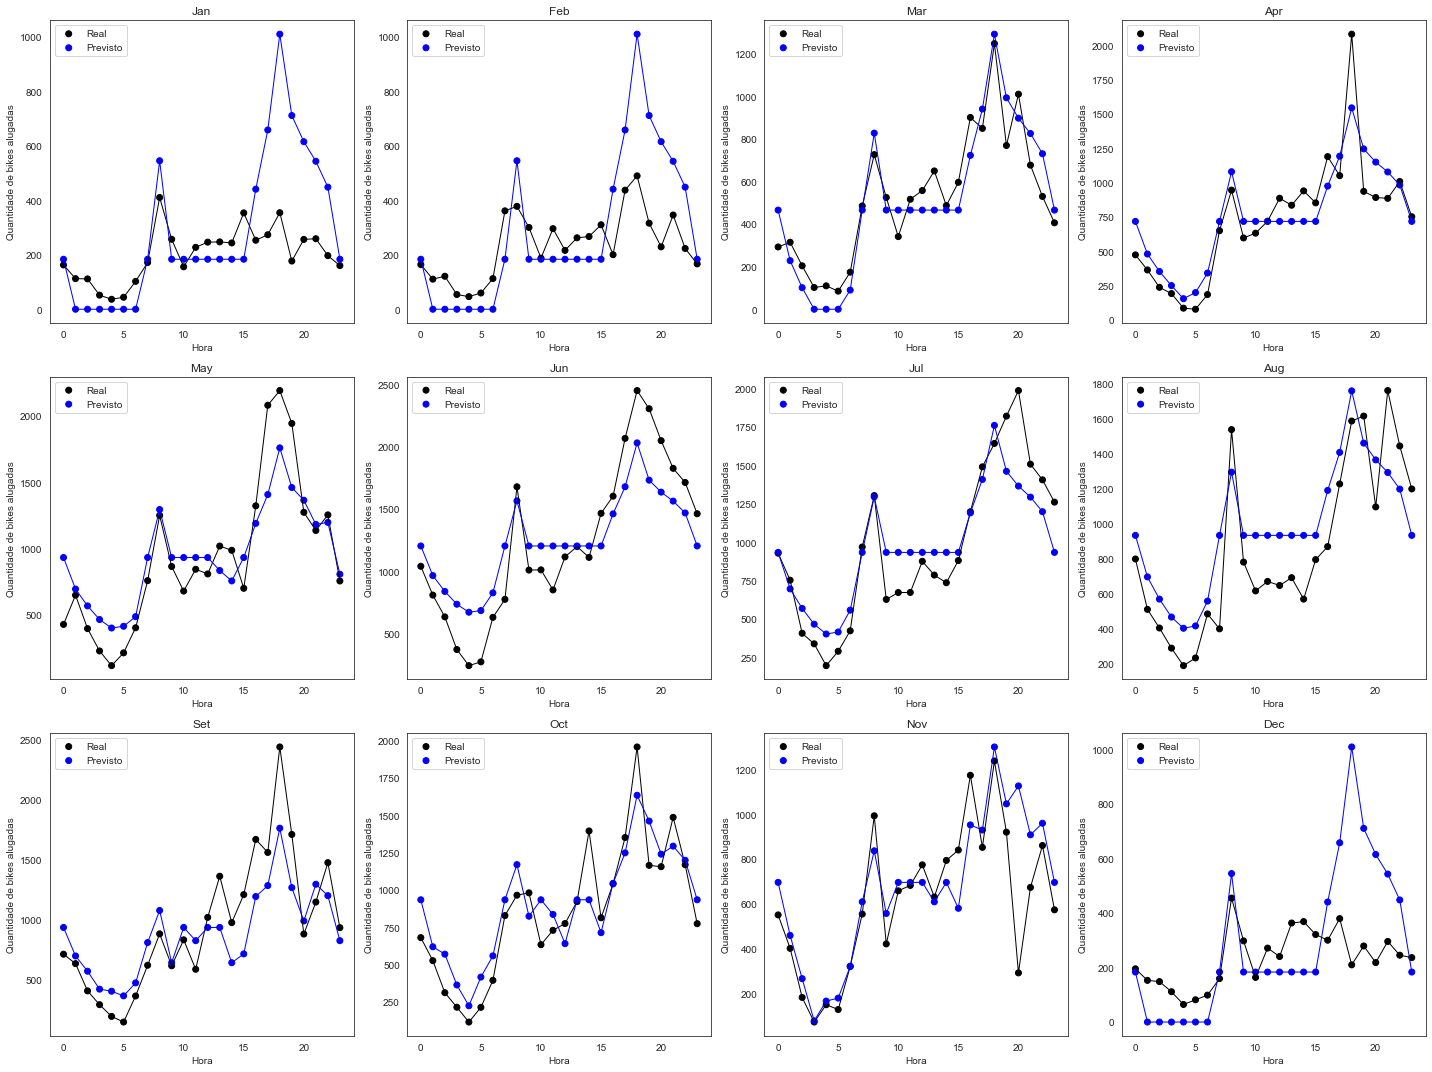

In [133]:
creating_charts_for_month(results_df_clipped_fs_lr)

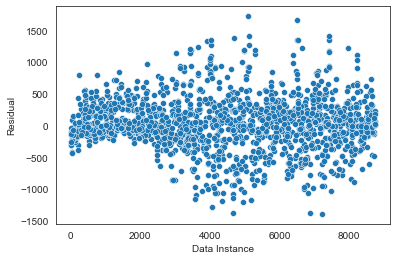

In [134]:
import seaborn as sns
residuals = predictions_clipped_fs_lr_y- test_y
sns.scatterplot(data = residuals)
plt.xlabel("Data Instance")
plt.ylabel("Residual")
plt.show()



In [132]:
#########################cell a mais####################Praticing the Residual


#calculating the Residual

#residual = y - predicted_y

results_df_residual = results_df.copy()

results_df_residual['predicted_bike_count'] = results_df_residual['predicted_bike_count'].astype('int')

results_df_residual['residual'] = results_df_residual['real_bike_count'] - results_df_residual['predicted_bike_count']

results_df_residual



,month,hour,real_bike_count,predicted_bike_count,residual
8391,11,15,971,689,282
556,12,4,79,-339,418
8746,11,10,554,689,-135
8199,11,15,848,689,159
3665,5,17,813,1435,-622
...,...,...,...,...,...
4408,6,16,1707,1481,226
1991,2,23,223,179,44
3340,4,4,125,182,-57
3099,4,3,52,258,-206


In [139]:
#########################cell a mais####################Praticing the Residual
def creating_charts_for_month_residual(residual_results_df):
    # Criar uma figura com subplots para cada mês
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))  # Assumindo 12 meses, ajuste conforme necessário

    # Iterar sobre cada mês e plotar os dados correspondentes
    for i, month in enumerate(range(1, 13)):  # Os meses estão numerados de 1 a 12
        ax = axes[i // 4, i % 4]  # Calcular a posição do subplot
        month_data = residual_results_df[residual_results_df['month'] == month]  # Selecionar os dados para o mês atual
        grouped_data = month_data.groupby('hour').agg({'residual': 'mean'}).reset_index()
    
        color_for_positive_real = 'black'
        color_for_negative_real = 'coral'
        color_for_positive_prevision = 'blue'
        color_for_negative_prevision = 'red'
    
        # Create an array of colors based on the values
        colors_real = [color_for_positive_real if value >= 0 else color_for_negative_real for value in grouped_data['residual']]
        #color_prevision = [color_for_positive_prevision if value >= 0 else color_for_negative_prevision for value in grouped_data['predicted_bike_count']]
    
        # Plotar os dados do mês atual
        ax.scatter(grouped_data['hour'], grouped_data['residual'], color=colors_real, label='Real')
        #ax.scatter(grouped_data['hour'], grouped_data['predicted_bike_count'], color=color_prevision, label='Previsto')
    
        # Plotar as linhas conectando os pontos
        ax.plot(grouped_data['hour'], grouped_data['residual'], color='black', linestyle='-', linewidth=1)
        #ax.plot(grouped_data['hour'], grouped_data['predicted_bike_count'], color='blue', linestyle='-', linewidth=1)
    
        # Configurar títulos e rótulos do eixo
        month_name = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Set',10:'Oct',11:'Nov',12:'Dec'}
        ax.set_title(month_name[month])
        ax.set_xlabel('Hora')
        ax.set_ylabel('Quantidade de bikes alugadas')
        ax.legend()

    # Ajustar layout
    plt.tight_layout()

    # Mostrar os subplots
    plt.show()


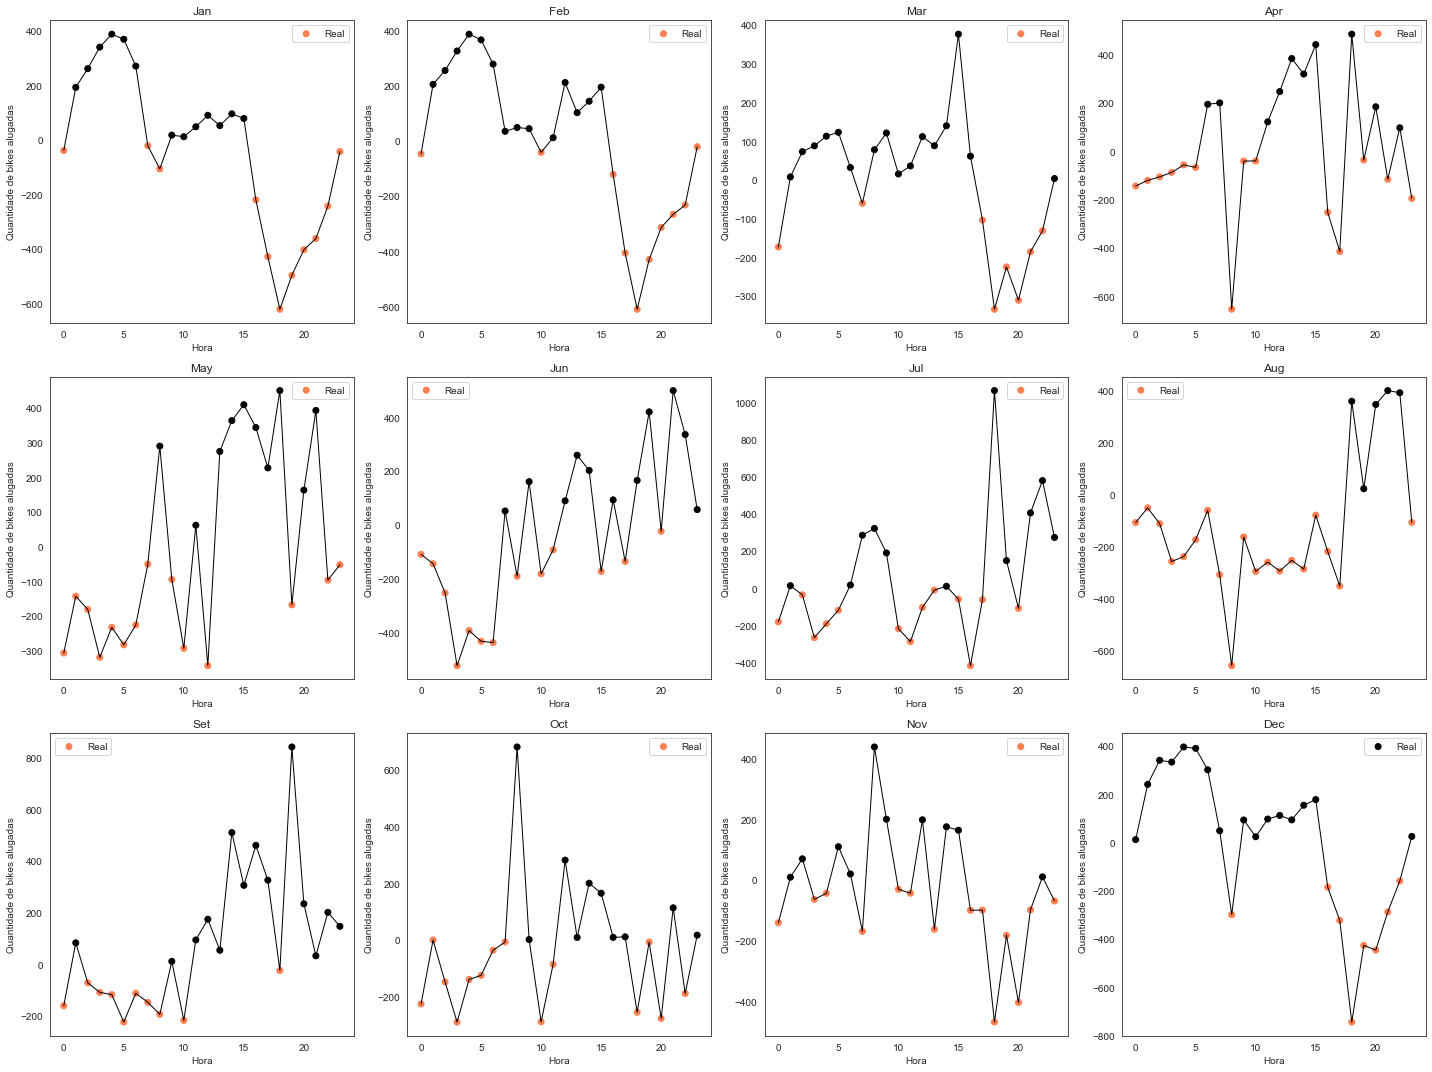

In [140]:
#########################cell a mais####################Praticing the Residual
creating_charts_for_month_residual(results_df_residual)

## Polynomial Regression

In [135]:
class PolynomialRegression(BaseEstimator):
    '''
    '''
    def __init__(self, degree=2):
        self.degree = degree
        self.poly_reg_model = LinearRegression()
        
    def _generate_polynomial_features_(self, X):
        '''
        '''
        new_columns = []
        columns = list(X)
        for c in columns:
            for d in range(2, (self.degree+1)):
                new_c = str(c)+"^"+str(d)
                X[new_c]=pow(X[c],d)
        return X

    def fit(self, X, y=None):
        '''
        '''
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        X = self._generate_polynomial_features_(X)
        self.poly_reg_model.fit(X,y)
        
    def predict(self, X):
        '''
        '''
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        X = self._generate_polynomial_features_(X)
        return self.poly_reg_model.predict(X)
            

In [136]:
poly_reg = PolynomialRegression(degree=11)
poly_lr_pl = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('scaler',StandardScaler()),
        ('poly_reg',poly_reg)
        
    ]
)

poly_lr_pl.fit(train_x,train_y)

Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=['hour',
                                                                 'seasons',
                                                                 'holiday',
                                                                 'functioning_day',
                                                                 'day_of_week',
                                                                 'month'])),
                ('scaler', StandardScaler()),
                ('poly_reg', PolynomialRegression(degree=11))])

In [137]:
predited_poly_y = poly_lr_pl.predict(test_x)

In [138]:
predited_poly_y

array([  72.75,  411.25, -528.5 , ...,  717.75,  223.75,  924.  ])

In [139]:
test_y.to_numpy()

array([235, 272,   0, ..., 930, 373, 820], dtype=int64)

In [140]:
r2_score(test_y.to_numpy(),predited_poly_y)

0.601524780006006

In [141]:
train_predited_poly_y = poly_lr_pl.predict(train_x)

In [142]:
rs_score_polyr = r2_score(train_y.to_numpy(),train_predited_poly_y)
rs_score_polyr

0.6146691848411399

In [143]:
minimun_value_poly = predited_poly_y.min() #novamente negative values
minimun_value_poly 

-696.75

### Plotting the Polynomial Regression charts

In [144]:
# https://matplotlib.org/stable/gallery/color/set_alpha.html#sphx-glr-gallery-color-set-alpha-py

### Agrupando os valores para montar um gráfico com valores agrupados

In [145]:
#########################
#Bom para isto eu terei que voltar a unir os test_x e o text_y, assim como os valores previstos:


# Criar um DataFrame com as previsões e os valores reais
grouped_data_poly = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': predited_poly_y})




In [146]:
grouped_data_poly 

,month,hour,real_bike_count,predicted_bike_count
538,12,10,235,72.75
2352,3,0,272,411.25
7420,10,4,0,-528.50
6574,8,22,1789,1142.25
6107,8,11,526,688.00
...,...,...,...,...
1444,1,4,33,-347.00
7398,10,6,531,621.25
6601,9,1,930,717.75
1977,2,9,373,223.75


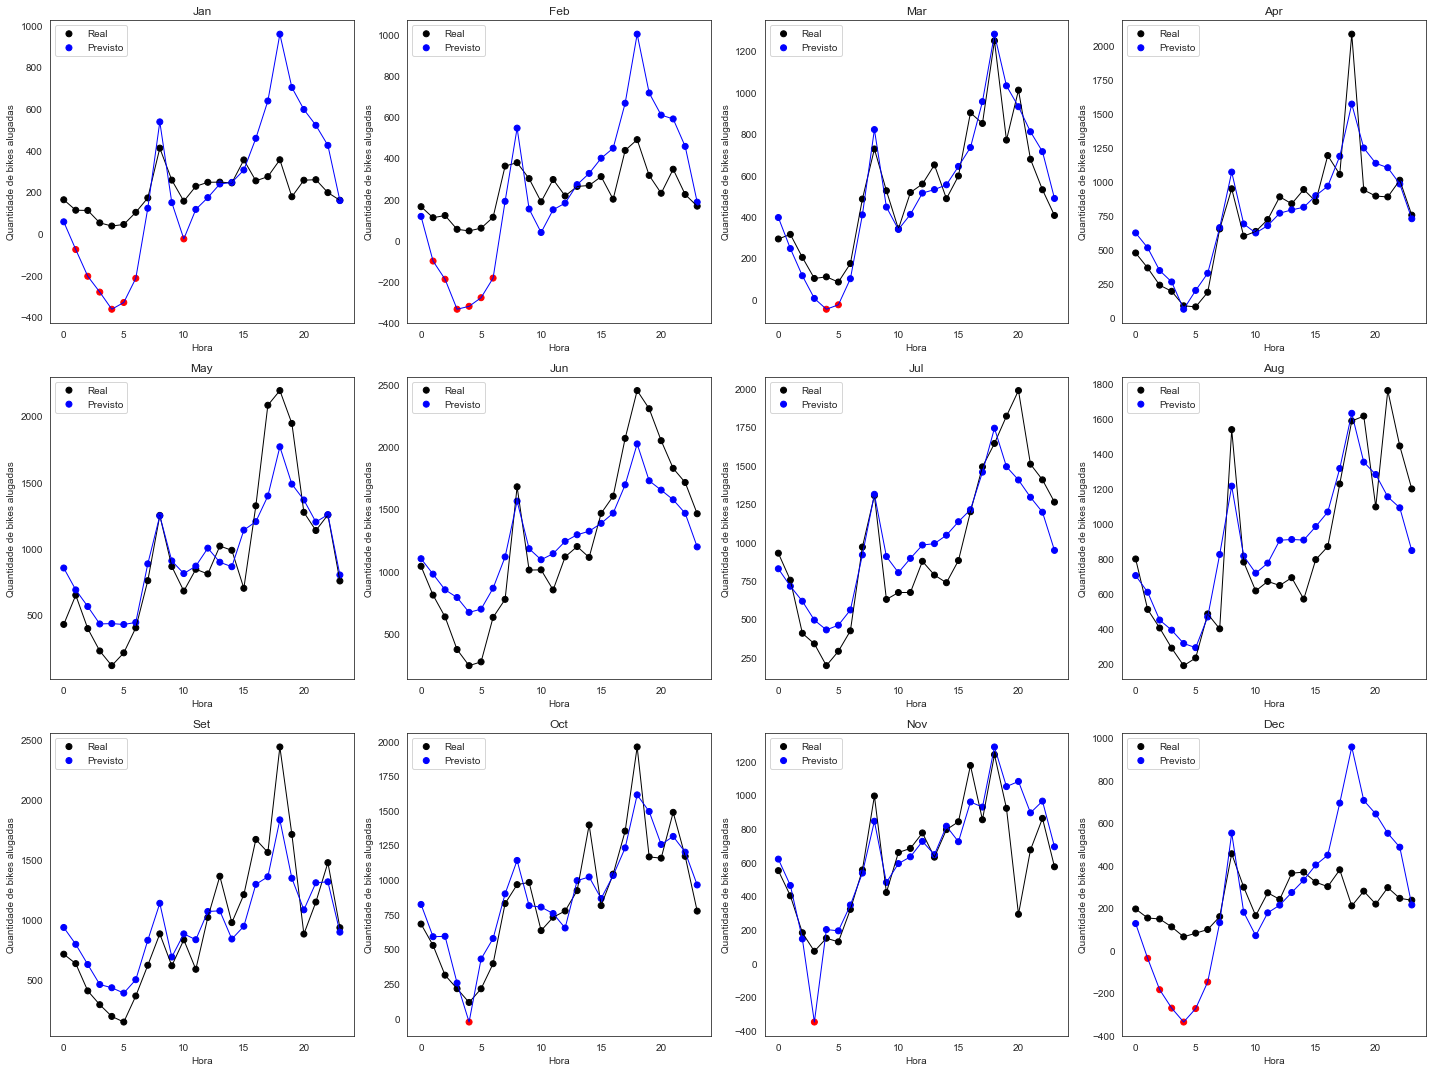

In [147]:
creating_charts_for_month(grouped_data_poly)

In [148]:
#We have a problem of overfitting here as explained in page 118

## Lasso

In [149]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_bike_model_pl = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('scaler',StandardScaler()),
        ('lr',lasso_model)
        
    ]
)
lasso_bike_model_pl.fit(train_x,train_y)


Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=['hour',
                                                                 'seasons',
                                                                 'holiday',
                                                                 'functioning_day',
                                                                 'day_of_week',
                                                                 'month'])),
                ('scaler', StandardScaler()), ('lr', Lasso())])

In [150]:
test_lasso_bike_y = lasso_bike_model_pl.predict(test_x)


In [151]:
test_lasso_bike_y

array([  78.38488719,  413.15012912, -514.74181877, ...,  716.13262472,
        230.32689216,  924.34320858])

In [152]:
rs_score_lasso = r2_score(test_y.to_numpy(),test_lasso_bike_y)
rs_score_lasso

0.6016029391584019

In [153]:
minimun_value_lasso = test_lasso_bike_y.min()
minimun_value_lasso

-682.2327434229553

In [154]:
#########################
#Bom para isto eu terei que voltar a unir os test_x e o text_y, assim como os valores previstos:


# Criar um DataFrame com as previsões e os valores reais
grouped_data_lasso = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': test_lasso_bike_y})



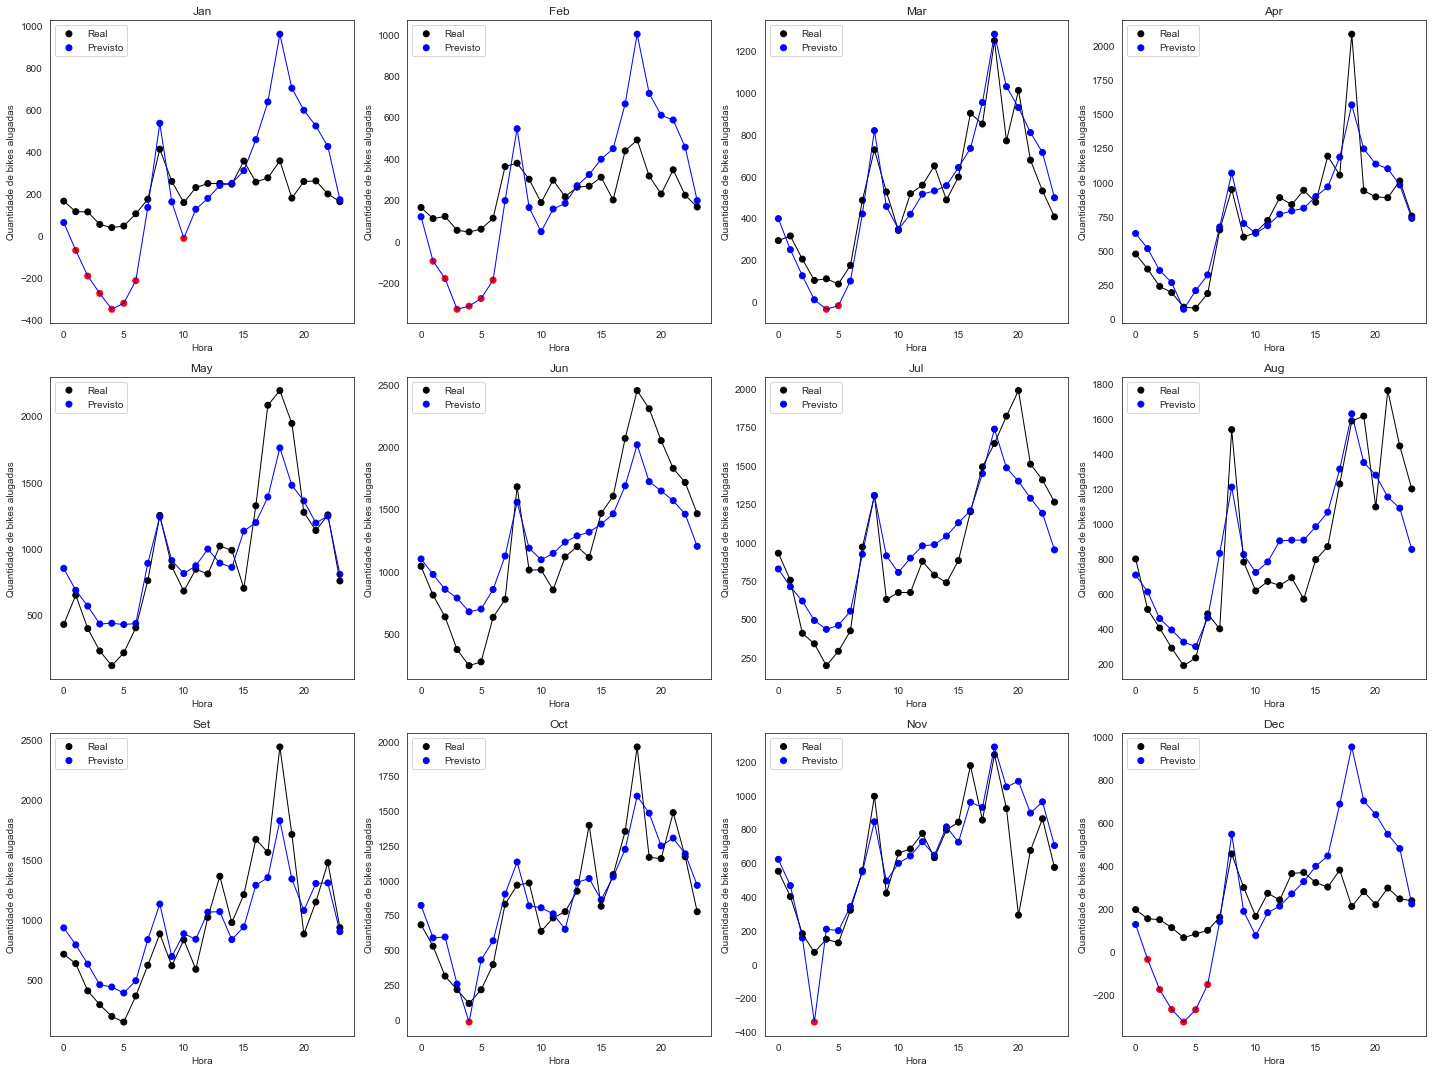

In [155]:
creating_charts_for_month(grouped_data_lasso)

In [156]:
#the clipping tecnique
predictions_clipped_lasso_bike_y = np.clip(test_lasso_bike_y, a_min=0, a_max=None)


## DecisionTreeRegressor

In [157]:
from sklearn.tree import DecisionTreeRegressor

dt_bike_reg = DecisionTreeRegressor()
dt_bike_reg_pl = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('scaler',StandardScaler()),
        ('dt_reg',dt_bike_reg)
        
    ]
)

dt_bike_reg_pl.fit(train_x,train_y)

Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=['hour',
                                                                 'seasons',
                                                                 'holiday',
                                                                 'functioning_day',
                                                                 'day_of_week',
                                                                 'month'])),
                ('scaler', StandardScaler()),
                ('dt_reg', DecisionTreeRegressor())])

In [158]:
predicted_bike_dt_reg_y = dt_bike_reg_pl.predict(test_x)
r2_score_dtr = r2_score(test_y,predicted_bike_dt_reg_y)
r2_score_dtr 

0.6212191388096897

In [159]:
#TO DO ver se o bonitão está prevendo números negativos

In [160]:
minimun_value_dtr = predicted_bike_dt_reg_y.min()
minimun_value_dtr

0.0

In [161]:
#I really liked this chart, with it I can have a real idea about the prevision and the real bikes rented. But I wish see it by month. Lest see how it works


# Criar um DataFrame com as previsões e os valores reais
results_df_dtr = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': predicted_bike_dt_reg_y})



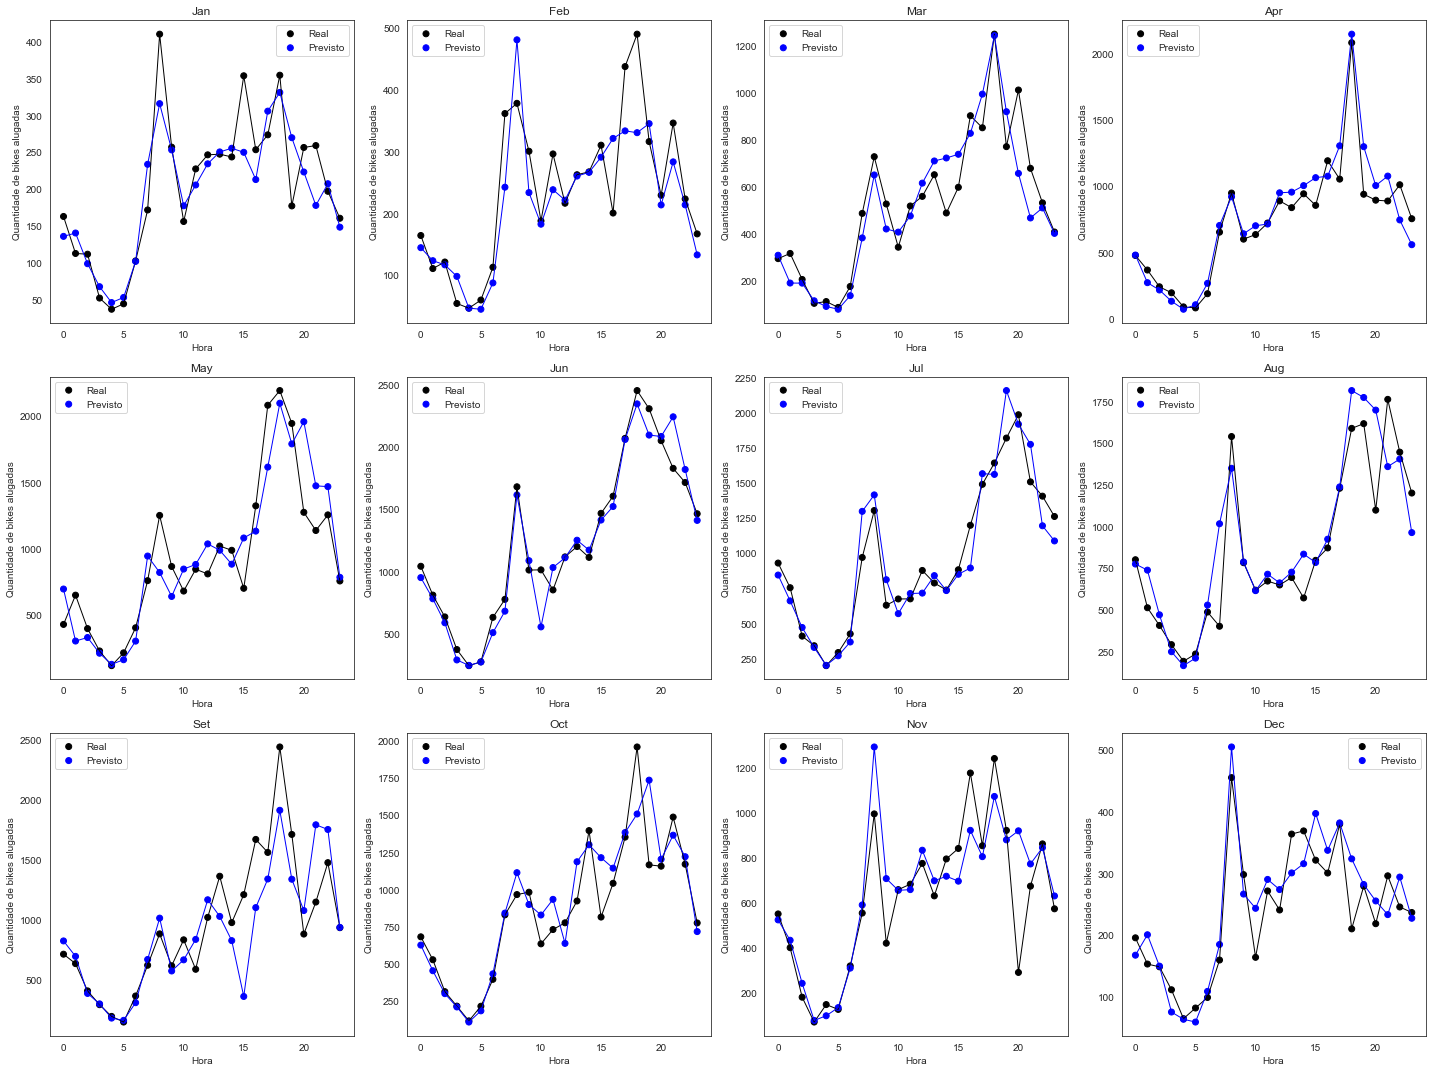

In [162]:
creating_charts_for_month(results_df_dtr)

## SVM

In [163]:


from sklearn.svm import LinearSVR

bike_svm_reg = LinearSVR(1.5)
bike_svm_reg_pl = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('scaler',StandardScaler()),
        ('SVM_reg',bike_svm_reg)
        
    ]
)

bike_svm_reg_pl.fit(train_x,train_y)

C:\Users\recal\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass epsilon=1.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=['hour',
                                                                 'seasons',
                                                                 'holiday',
                                                                 'functioning_day',
                                                                 'day_of_week',
                                                                 'month'])),
                ('scaler', StandardScaler()),
                ('SVM_reg', LinearSVR(epsilon=1.5))])

In [164]:
predicted_bike_dt_svm_y =bike_svm_reg_pl.predict(test_x)
rs_score_svm_lsvr = r2_score(test_y.to_numpy(),predicted_bike_dt_svm_y)
rs_score_svm_lsvr

0.5597394303050662

In [165]:
test_y

538      235
2352     272
7420       0
6574    1789
6107     526
        ... 
1444      33
7398     531
6601     930
1977     373
6111     820
Name: rented_bike_count, Length: 1752, dtype: int64

In [166]:
predicted_bike_dt_svm_y

array([ 171.42567519,  446.41275613, -565.24789952, ...,  716.14382234,
        275.39187082,  865.65506252])

In [167]:
minimun_value_svm_lsvr = predicted_bike_dt_svm_y.min()
minimun_value_svm_lsvr

-725.3429113701997

In [168]:
#I really liked this chart, with it I can have a real idea about the prevision and the real bikes rented. But I wish see it by month. Lest see how it works


# Criar um DataFrame com as previsões e os valores reais
results_df_svm = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': predicted_bike_dt_svm_y})



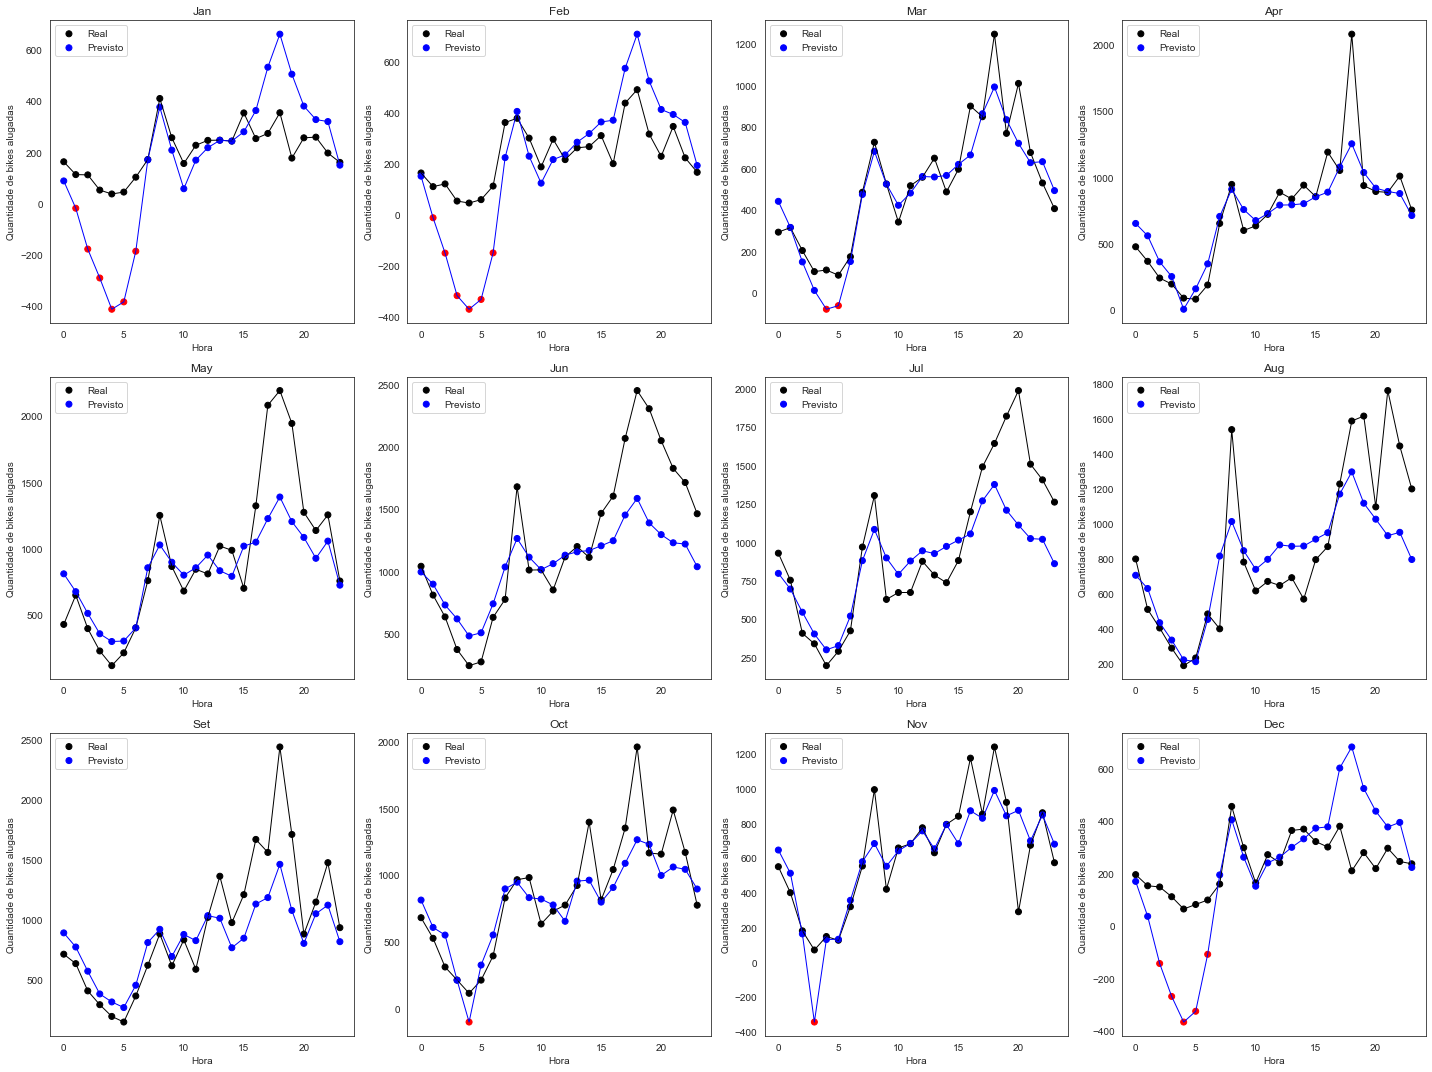

In [169]:
creating_charts_for_month(results_df_svm)

## SVR

In [170]:
from sklearn.svm import SVR

bike_svm_reg_2 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
bike_svm_reg_pl_2 = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('scaler',StandardScaler()),
        ('SVM_reg_2',bike_svm_reg_2)
        
    ]
)

bike_svm_reg_pl_2.fit(train_x,train_y)

Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=['hour',
                                                                 'seasons',
                                                                 'holiday',
                                                                 'functioning_day',
                                                                 'day_of_week',
                                                                 'month'])),
                ('scaler', StandardScaler()),
                ('SVM_reg_2', SVR(C=100, degree=2, kernel='poly'))])

In [171]:
predicted_bike_dt_svm_y_2 =bike_svm_reg_pl_2.predict(test_x)
rs_score_svm_svr = r2_score(test_y.to_numpy(),predicted_bike_dt_svm_y_2)
rs_score_svm_svr

0.7250937200352081

In [172]:
minimun_values_svm_svr = predicted_bike_dt_svm_y_2.min()
minimun_values_svm_svr

-562.1911696278027

In [173]:

# Criar um DataFrame com as previsões e os valores reais
results_df_svr = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': predicted_bike_dt_svm_y_2})



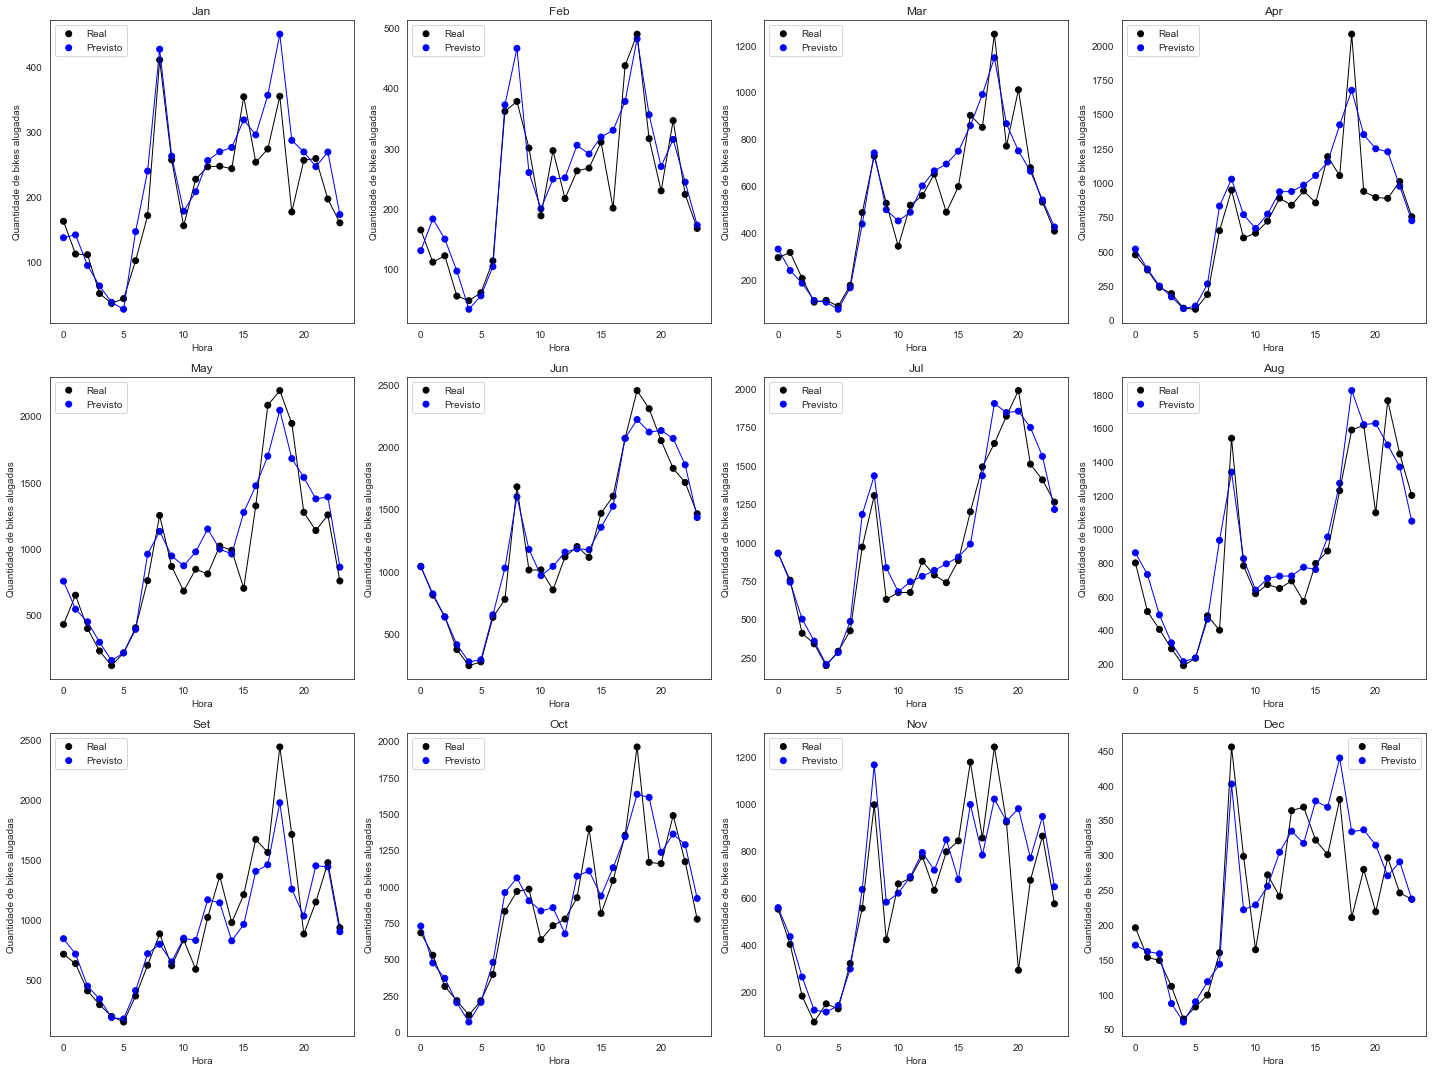

In [174]:
creating_charts_for_month(results_df_svr)

In [175]:
models_results = pd.DataFrame({'Model_Name': ['Foward Selection Linear Regression',
                                            'Polynomial Regression',
                                            'Lasso',
                                            'Decision Tree Regressor',
                                            'SVM LinearSVR',
                                            'SVM SVR'],
                             'R2 Score':[r2_score_fs_lr,
                                        rs_score_polyr,
                                        rs_score_lasso,
                                        r2_score_dtr,
                                        rs_score_svm_lsvr,
                                        rs_score_svm_svr],
                             'Minimun Value':[minimun_value_fs,
                                             minimun_value_poly,
                                             minimun_value_lasso,
                                             minimun_value_dtr,
                                             minimun_value_svm_lsvr,
                                             minimun_values_svm_svr]}
                             )
models_results = models_results.sort_values(by='R2 Score', ascending=False)
models_results

,Model_Name,R2 Score,Minimun Value
5,SVM SVR,0.725094,-562.191170
3,Decision Tree Regressor,0.621219,0.000000
1,Polynomial Regression,0.614669,-696.750000
2,Lasso,0.601603,-682.232743
0,Foward Selection Linear Regression,0.585936,-693.867023
4,SVM LinearSVR,0.559739,-725.342911


## End
